# Set Up e importacion de Paquetes

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlite3
import statsmodels.api as sm
from math import ceil


# Scikit Learn
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from category_encoders import TargetEncoder
from sklearn.metrics import classification_report, confusion_matrix,roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.feature_selection import mutual_info_regression

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.ensemble import HistGradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")

# Configuración de visualización
sns.set(style="whitegrid")

# Carga inicial de datos

In [3]:
# Conectar a la base de datos
conn = sqlite3.connect("hipermercado.db")

# Obtener nombres de las tablas
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql(query, conn)
print(tables)

          name
0     calendar
1  sell_prices
2        sales


In [4]:
# Cargar la tabla 'calendar'
df_calendar = pd.read_sql("SELECT * FROM calendar", conn)

# Mostrar las primeras filas
display(df_calendar.head())

# Revisar estructura y valores nulos
df_calendar.info()
display(df_calendar.describe())

index        date  wm_yr_wk    weekday  wday  month  year      d  \
0      0  2013-01-01     11249    Tuesday     4      1  2013  d_704   
1      1  2013-01-02     11249  Wednesday     5      1  2013  d_705   
2      2  2013-01-03     11249   Thursday     6      1  2013  d_706   
3      3  2013-01-04     11249     Friday     7      1  2013  d_707   
4      4  2013-01-05     11250   Saturday     1      1  2013  d_708   

  event_name_1 event_type_1 event_name_2 event_type_2  
0      NewYear     National         None         None  
1         None         None         None         None  
2         None         None         None         None  
3         None         None         None         None  
4         None         None         None         None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         1095 non-null   int64 
 1   date          1095 non-null   object
 2   wm_yr_wk      1095 non-null   int64 
 3   weekday       1095 non-null   object
 4   wday          1095 non-null   int64 
 5   month         1095 non-null   int64 
 6   year          1095 non-null   int64 
 7   d             1095 non-null   object
 8   event_name_1  87 non-null     object
 9   event_type_1  87 non-null     object
 10  event_name_2  3 non-null      object
 11  event_type_2  3 non-null      object
dtypes: int64(5), object(7)
memory usage: 102.8+ KB


index      wm_yr_wk         wday        month        year
count  1095.000000   1095.000000  1095.000000  1095.000000  1095.00000
mean    547.000000  11418.734247     4.002740     6.526027  2014.00000
std     316.243577     84.574814     1.999312     3.449427     0.81687
min       0.000000  11249.000000     1.000000     1.000000  2013.00000
25%     273.500000  11336.000000     2.000000     4.000000  2013.00000
50%     547.000000  11422.000000     4.000000     7.000000  2014.00000
75%     820.500000  11509.000000     6.000000    10.000000  2015.00000
max    1094.000000  11548.000000     7.000000    12.000000  2015.00000

In [5]:
df_calendar.drop(columns = 'index', inplace = True)

In [6]:
df_calendar.head(10)

date  wm_yr_wk    weekday  wday  month  year      d  \
0  2013-01-01     11249    Tuesday     4      1  2013  d_704   
1  2013-01-02     11249  Wednesday     5      1  2013  d_705   
2  2013-01-03     11249   Thursday     6      1  2013  d_706   
3  2013-01-04     11249     Friday     7      1  2013  d_707   
4  2013-01-05     11250   Saturday     1      1  2013  d_708   
5  2013-01-06     11250     Sunday     2      1  2013  d_709   
6  2013-01-07     11250     Monday     3      1  2013  d_710   
7  2013-01-08     11250    Tuesday     4      1  2013  d_711   
8  2013-01-09     11250  Wednesday     5      1  2013  d_712   
9  2013-01-10     11250   Thursday     6      1  2013  d_713   

        event_name_1 event_type_1 event_name_2 event_type_2  
0            NewYear     National         None         None  
1               None         None         None         None  
2               None         None         None         None  
3               None         None         None         None  
4               None         None         None         None  
5               None         None         None         None  
6  OrthodoxChristmas    Religious         None         None  
7               None         None         None         None  
8               None         None         None         None  
9               None         None         None         None

In [7]:
# Cargar la tabla 'sell_prices'
df_prices = pd.read_sql("SELECT * FROM sell_prices", conn)

# Mostrar las primeras filas
display(df_prices.head())

# Revisar estructura y valores nulos
df_prices.info()
display(df_prices.describe())


index store_id      item_id  wm_yr_wk  sell_price
0  1862524     CA_3  FOODS_3_090     11249        1.25
1  1862525     CA_3  FOODS_3_090     11250        1.25
2  1862526     CA_3  FOODS_3_090     11251        1.25
3  1862527     CA_3  FOODS_3_090     11252        1.25
4  1862528     CA_3  FOODS_3_090     11301        1.38

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       3129 non-null   int64  
 1   store_id    3129 non-null   object 
 2   item_id     3129 non-null   object 
 3   wm_yr_wk    3129 non-null   int64  
 4   sell_price  3129 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 122.4+ KB


index      wm_yr_wk   sell_price
count  3.129000e+03   3129.000000  3129.000000
mean   2.267331e+06  11418.930010     2.398661
std    3.433952e+05     84.594526     1.238799
min    1.862524e+06  11249.000000     1.000000
25%    1.917809e+06  11336.000000     1.500000
50%    2.004388e+06  11422.000000     1.580000
75%    2.598216e+06  11509.000000     2.980000
max    2.683550e+06  11548.000000     4.980000

In [8]:
# Cargar la tabla 'sales'
df_sales = pd.read_sql("SELECT * FROM sales", conn)

# Mostrar las primeras filas
display(df_sales.head())

# Revisar estructura y valores nulos
df_sales.info()
display(df_sales.describe())


index                           id      item_id  dept_id cat_id store_id  \
0   8412  FOODS_3_090_CA_3_validation  FOODS_3_090  FOODS_3  FOODS     CA_3   
1   8442  FOODS_3_120_CA_3_validation  FOODS_3_120  FOODS_3  FOODS     CA_3   
2   8524  FOODS_3_202_CA_3_validation  FOODS_3_202  FOODS_3  FOODS     CA_3   
3   8574  FOODS_3_252_CA_3_validation  FOODS_3_252  FOODS_3  FOODS     CA_3   
4   8610  FOODS_3_288_CA_3_validation  FOODS_3_288  FOODS_3  FOODS     CA_3   

  state_id  d_704  d_705  d_706  ...  d_1789  d_1790  d_1791  d_1792  d_1793  \
0       CA      0    224    241  ...       5       2       0       0       6   
1       CA      0      0      0  ...      54      63      44       0      65   
2       CA     20     23     23  ...      43      40      39       0      29   
3       CA     34     27     40  ...      31      43      32       0      52   
4       CA      0      0      0  ...      29      45      28       0      46   

   d_1794  d_1795  d_1796  d_1797  d_1798  
0       0       6       0       0       0  
1      90     104      73      76      97  
2      33      27      13      26      47  
3      37      32      29      34      27  
4      36      40      31      46      36  

[5 rows x 1102 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Columns: 1102 entries, index to d_1798
dtypes: int64(1096), object(6)
memory usage: 172.3+ KB


index      d_704       d_705       d_706       d_707  \
count     20.000000  20.000000   20.000000   20.000000   20.000000   
mean   10218.700000  13.550000   28.250000   29.750000   30.850000   
std     1578.741207  15.003421   50.388882   53.095619   51.752727   
min     8412.000000   0.000000    0.000000    0.000000    0.000000   
25%     8640.750000   0.000000    4.750000    4.250000    4.750000   
50%    10248.000000   8.000000   13.000000   15.000000   17.000000   
75%    11669.250000  20.750000   28.000000   31.000000   31.000000   
max    12084.000000  50.000000  224.000000  241.000000  232.000000   

            d_708       d_709       d_710       d_711       d_712  ...  \
count   20.000000   20.000000   20.000000   20.000000   20.000000  ...   
mean    38.200000   37.500000   28.600000   26.300000   23.300000  ...   
std     68.555471   62.829343   43.148946   47.444261   42.939492  ...   
min      0.000000    0.000000    0.000000    0.000000    0.000000  ...   
25%      4.000000    5.000000    5.250000    4.000000    3.500000  ...   
50%     10.500000   14.000000   15.000000   12.000000   10.500000  ...   
75%     36.250000   37.500000   28.500000   26.000000   24.000000  ...   
max    301.000000  270.000000  188.000000  215.000000  197.000000  ...   

          d_1789    d_1790     d_1791     d_1792     d_1793     d_1794  \
count  20.000000  20.00000  20.000000  20.000000  20.000000  20.000000   
mean   26.550000  24.25000  21.800000   0.050000  23.700000  23.250000   
std    24.828835  22.92063  22.001435   0.223607  22.729763  26.421433   
min     0.000000   0.00000   0.000000   0.000000   0.000000   0.000000   
25%     9.250000   5.25000   6.750000   0.000000   5.500000   4.750000   
50%    16.000000  17.00000  14.500000   0.000000  16.500000  12.000000   
75%    38.500000  40.75000  33.250000   0.000000  36.250000  33.750000   
max    93.000000  77.00000  82.000000   1.000000  75.000000  90.000000   

           d_1795     d_1796     d_1797     d_1798  
count   20.000000  20.000000  20.000000  20.000000  
mean    23.500000  18.150000  18.750000  23.200000  
std     24.230255  18.835227  20.703102  23.904635  
min      0.000000   0.000000   0.000000   0.000000  
25%      7.000000   4.750000   3.000000   6.000000  
50%     16.500000  11.000000  10.500000  18.000000  
75%     30.500000  29.000000  28.000000  30.000000  
max    104.000000  73.000000  76.000000  97.000000  

[8 rows x 1096 columns]

# Crear DatMart

## Preparar df_sales

In [9]:
df_sales.drop(columns='index', inplace = True)
df_sales

id      item_id  dept_id cat_id store_id  \
0   FOODS_3_090_CA_3_validation  FOODS_3_090  FOODS_3  FOODS     CA_3   
1   FOODS_3_120_CA_3_validation  FOODS_3_120  FOODS_3  FOODS     CA_3   
2   FOODS_3_202_CA_3_validation  FOODS_3_202  FOODS_3  FOODS     CA_3   
3   FOODS_3_252_CA_3_validation  FOODS_3_252  FOODS_3  FOODS     CA_3   
4   FOODS_3_288_CA_3_validation  FOODS_3_288  FOODS_3  FOODS     CA_3   
5   FOODS_3_329_CA_3_validation  FOODS_3_329  FOODS_3  FOODS     CA_3   
6   FOODS_3_555_CA_3_validation  FOODS_3_555  FOODS_3  FOODS     CA_3   
7   FOODS_3_586_CA_3_validation  FOODS_3_586  FOODS_3  FOODS     CA_3   
8   FOODS_3_587_CA_3_validation  FOODS_3_587  FOODS_3  FOODS     CA_3   
9   FOODS_3_714_CA_3_validation  FOODS_3_714  FOODS_3  FOODS     CA_3   
10  FOODS_3_090_CA_4_validation  FOODS_3_090  FOODS_3  FOODS     CA_4   
11  FOODS_3_120_CA_4_validation  FOODS_3_120  FOODS_3  FOODS     CA_4   
12  FOODS_3_202_CA_4_validation  FOODS_3_202  FOODS_3  FOODS     CA_4   
13  FOODS_3_252_CA_4_validation  FOODS_3_252  FOODS_3  FOODS     CA_4   
14  FOODS_3_288_CA_4_validation  FOODS_3_288  FOODS_3  FOODS     CA_4   
15  FOODS_3_329_CA_4_validation  FOODS_3_329  FOODS_3  FOODS     CA_4   
16  FOODS_3_555_CA_4_validation  FOODS_3_555  FOODS_3  FOODS     CA_4   
17  FOODS_3_586_CA_4_validation  FOODS_3_586  FOODS_3  FOODS     CA_4   
18  FOODS_3_587_CA_4_validation  FOODS_3_587  FOODS_3  FOODS     CA_4   
19  FOODS_3_714_CA_4_validation  FOODS_3_714  FOODS_3  FOODS     CA_4   

   state_id  d_704  d_705  d_706  d_707  ...  d_1789  d_1790  d_1791  d_1792  \
0        CA      0    224    241    232  ...       5       2       0       0   
1        CA      0      0      0      0  ...      54      63      44       0   
2        CA     20     23     23     25  ...      43      40      39       0   
3        CA     34     27     40     49  ...      31      43      32       0   
4        CA      0      0      0      0  ...      29      45      28       0   
5        CA     39     75     54     46  ...      66      56      60       0   
6        CA      9     31     37     24  ...      52      35      37       1   
7        CA     50     62     65     76  ...      93      77      82       0   
8        CA     23     24     19     17  ...      37      23      23       0   
9        CA     17     16     24     26  ...      32      21      18       0   
10       CA     33     32     29     52  ...       0       0       0       0   
11       CA      0      0      0      0  ...       0       0       0       0   
12       CA      5      5      2      5  ...      17      17      22       0   
13       CA      6      5      6     17  ...      11       6       7       0   
14       CA      0      0      0      0  ...      11       8       8       0   
15       CA      0      6      5      4  ...       7       3       6       0   
16       CA      7      4      9      9  ...       4       3       3       0   
17       CA      9     16     20     20  ...      10      14      11       0   
18       CA     12     10     10     10  ...      14      12       8       0   
19       CA      7      5     11      5  ...      15      17       8       0   

    d_1793  d_1794  d_1795  d_1796  d_1797  d_1798  
0        6       0       6       0       0       0  
1       65      90     104      73      76      97  
2       29      33      27      13      26      47  
3       52      37      32      29      34      27  
4       46      36      40      31      46      36  
5       46      64      49      44      37      44  
6       31      32      23      29      10      20  
7       75      77      50      42      50      56  
8       33      20      30      28      25      28  
9       22      15      13      10      18      24  
10       0       0       0       0       0       0  
11       0      12      19       7       0       0  
12      17       9       8       4       8      14  
13       4       3       2       5       7       6  
14       8       8 

In [10]:
df_sales = df_sales.melt(id_vars = df_sales.columns[0:6],
                         var_name = 'd',
                         value_name = 'ventas')
df_sales

id      item_id  dept_id cat_id store_id  \
0      FOODS_3_090_CA_3_validation  FOODS_3_090  FOODS_3  FOODS     CA_3   
1      FOODS_3_120_CA_3_validation  FOODS_3_120  FOODS_3  FOODS     CA_3   
2      FOODS_3_202_CA_3_validation  FOODS_3_202  FOODS_3  FOODS     CA_3   
3      FOODS_3_252_CA_3_validation  FOODS_3_252  FOODS_3  FOODS     CA_3   
4      FOODS_3_288_CA_3_validation  FOODS_3_288  FOODS_3  FOODS     CA_3   
...                            ...          ...      ...    ...      ...   
21895  FOODS_3_329_CA_4_validation  FOODS_3_329  FOODS_3  FOODS     CA_4   
21896  FOODS_3_555_CA_4_validation  FOODS_3_555  FOODS_3  FOODS     CA_4   
21897  FOODS_3_586_CA_4_validation  FOODS_3_586  FOODS_3  FOODS     CA_4   
21898  FOODS_3_587_CA_4_validation  FOODS_3_587  FOODS_3  FOODS     CA_4   
21899  FOODS_3_714_CA_4_validation  FOODS_3_714  FOODS_3  FOODS     CA_4   

      state_id       d  ventas  
0           CA   d_704       0  
1           CA   d_704       0  
2           CA   d_704      20  
3           CA   d_704      34  
4           CA   d_704       0  
...        ...     ...     ...  
21895       CA  d_1798       6  
21896       CA  d_1798       5  
21897       CA  d_1798      11  
21898       CA  d_1798      16  
21899       CA  d_1798      21  

[21900 rows x 8 columns]

## Unir con tabla df_calendar

In [11]:
df = df_sales.merge(right = df_calendar, how = 'left', on = 'd')
df.head()

id      item_id  dept_id cat_id store_id state_id  \
0  FOODS_3_090_CA_3_validation  FOODS_3_090  FOODS_3  FOODS     CA_3       CA   
1  FOODS_3_120_CA_3_validation  FOODS_3_120  FOODS_3  FOODS     CA_3       CA   
2  FOODS_3_202_CA_3_validation  FOODS_3_202  FOODS_3  FOODS     CA_3       CA   
3  FOODS_3_252_CA_3_validation  FOODS_3_252  FOODS_3  FOODS     CA_3       CA   
4  FOODS_3_288_CA_3_validation  FOODS_3_288  FOODS_3  FOODS     CA_3       CA   

       d  ventas        date  wm_yr_wk  weekday  wday  month  year  \
0  d_704       0  2013-01-01     11249  Tuesday     4      1  2013   
1  d_704       0  2013-01-01     11249  Tuesday     4      1  2013   
2  d_704      20  2013-01-01     11249  Tuesday     4      1  2013   
3  d_704      34  2013-01-01     11249  Tuesday     4      1  2013   
4  d_704       0  2013-01-01     11249  Tuesday     4      1  2013   

  event_name_1 event_type_1 event_name_2 event_type_2  
0      NewYear     National         None         None  
1      NewYear     National         None         None  
2      NewYear     National         None         None  
3      NewYear     National         None         None  
4      NewYear     National         None         None

## Incorporar Price

In [12]:
df = df.merge(right = df_prices, how = 'left', on = ['store_id','item_id','wm_yr_wk'])
df

id      item_id  dept_id cat_id store_id  \
0      FOODS_3_090_CA_3_validation  FOODS_3_090  FOODS_3  FOODS     CA_3   
1      FOODS_3_120_CA_3_validation  FOODS_3_120  FOODS_3  FOODS     CA_3   
2      FOODS_3_202_CA_3_validation  FOODS_3_202  FOODS_3  FOODS     CA_3   
3      FOODS_3_252_CA_3_validation  FOODS_3_252  FOODS_3  FOODS     CA_3   
4      FOODS_3_288_CA_3_validation  FOODS_3_288  FOODS_3  FOODS     CA_3   
...                            ...          ...      ...    ...      ...   
21895  FOODS_3_329_CA_4_validation  FOODS_3_329  FOODS_3  FOODS     CA_4   
21896  FOODS_3_555_CA_4_validation  FOODS_3_555  FOODS_3  FOODS     CA_4   
21897  FOODS_3_586_CA_4_validation  FOODS_3_586  FOODS_3  FOODS     CA_4   
21898  FOODS_3_587_CA_4_validation  FOODS_3_587  FOODS_3  FOODS     CA_4   
21899  FOODS_3_714_CA_4_validation  FOODS_3_714  FOODS_3  FOODS     CA_4   

      state_id       d  ventas        date  wm_yr_wk   weekday  wday  month  \
0           CA   d_704       0  2013-01-01     11249   Tuesday     4      1   
1           CA   d_704       0  2013-01-01     11249   Tuesday     4      1   
2           CA   d_704      20  2013-01-01     11249   Tuesday     4      1   
3           CA   d_704      34  2013-01-01     11249   Tuesday     4      1   
4           CA   d_704       0  2013-01-01     11249   Tuesday     4      1   
...        ...     ...     ...         ...       ...       ...   ...    ...   
21895       CA  d_1798       6  2015-12-31     11548  Thursday     6     12   
21896       CA  d_1798       5  2015-12-31     11548  Thursday     6     12   
21897       CA  d_1798      11  2015-12-31     11548  Thursday     6     12   
21898       CA  d_1798      16  2015-12-31     11548  Thursday     6     12   
21899       CA  d_1798      21  2015-12-31     11548  Thursday     6     12   

       year event_name_1 event_type_1 event_name_2 event_type_2      index  \
0      2013      NewYear     National         None         None  1862524.0   
1      2013      NewYear     National         None         None  1869694.0   
2      2013      NewYear     National         None         None  1888210.0   
3      2013      NewYear     National         None         None  1900157.0   
4      2013      NewYear     National         None         None        NaN   
...     ...          ...          ...          ...          ...        ...   
21895  2015         None         None         None         None  2598370.0   
21896  2015         None         None         None         None  2648674.0   
21897  2015         None         None         None         None  2655827.0   
21898  2015         None         None         None         None  2656109.0   
21899  2015         None         None         None         None  2683550.0   

       sell_price  
0            1.25  
1            4.98  
2            4.28  
3            1.48  
4             NaN  
...           ...  
21895        2.98  
21896        1.68  
21897        1.68  
21898        2.48  
21899        1.58  

[21900 rows x 20 columns]

## Reordenar y utilizar Date como index

In [13]:
df.head(1)

id      item_id  dept_id cat_id store_id state_id  \
0  FOODS_3_090_CA_3_validation  FOODS_3_090  FOODS_3  FOODS     CA_3       CA   

       d  ventas        date  wm_yr_wk  weekday  wday  month  year  \
0  d_704       0  2013-01-01     11249  Tuesday     4      1  2013   

  event_name_1 event_type_1 event_name_2 event_type_2      index  sell_price  
0      NewYear     National         None         None  1862524.0        1.25

In [14]:
orden = ['date',
         'state_id',
         'store_id',
         'dept_id',
         'cat_id',
         'item_id',
         'wm_yr_wk',
         'd',
         'ventas',
         'sell_price',
         'year',
         'month',
         'wday',
         'weekday',
         'event_name_1',
         'event_type_1',
         'event_name_2',
         'event_type_2']

In [15]:
df = df[orden].set_index('date')
df

state_id store_id  dept_id cat_id      item_id  wm_yr_wk       d  \
date                                                                          
2013-01-01       CA     CA_3  FOODS_3  FOODS  FOODS_3_090     11249   d_704   
2013-01-01       CA     CA_3  FOODS_3  FOODS  FOODS_3_120     11249   d_704   
2013-01-01       CA     CA_3  FOODS_3  FOODS  FOODS_3_202     11249   d_704   
2013-01-01       CA     CA_3  FOODS_3  FOODS  FOODS_3_252     11249   d_704   
2013-01-01       CA     CA_3  FOODS_3  FOODS  FOODS_3_288     11249   d_704   
...             ...      ...      ...    ...          ...       ...     ...   
2015-12-31       CA     CA_4  FOODS_3  FOODS  FOODS_3_329     11548  d_1798   
2015-12-31       CA     CA_4  FOODS_3  FOODS  FOODS_3_555     11548  d_1798   
2015-12-31       CA     CA_4  FOODS_3  FOODS  FOODS_3_586     11548  d_1798   
2015-12-31       CA     CA_4  FOODS_3  FOODS  FOODS_3_587     11548  d_1798   
2015-12-31       CA     CA_4  FOODS_3  FOODS  FOODS_3_714     11548  d_1798   

            ventas  sell_price  year  month  wday   weekday event_name_1  \
date                                                                       
2013-01-01       0        1.25  2013      1     4   Tuesday      NewYear   
2013-01-01       0        4.98  2013      1     4   Tuesday      NewYear   
2013-01-01      20        4.28  2013      1     4   Tuesday      NewYear   
2013-01-01      34        1.48  2013      1     4   Tuesday      NewYear   
2013-01-01       0         NaN  2013      1     4   Tuesday      NewYear   
...            ...         ...   ...    ...   ...       ...          ...   
2015-12-31       6        2.98  2015     12     6  Thursday         None   
2015-12-31       5        1.68  2015     12     6  Thursday         None   
2015-12-31      11        1.68  2015     12     6  Thursday         None   
2015-12-31      16        2.48  2015     12     6  Thursday         None   
2015-12-31      21        1.58  2015     12     6  Thursday         None   

           event_type_1 event_name_2 event_type_2  
date                                               
2013-01-01     National         None         None  
2013-01-01     National         None         None  
2013-01-01     National         None         None  
2013-01-01     National         None         None  
2013-01-01     National         None         None  
...                 ...          ...          ...  
2015-12-31         None         None         None  
2015-12-31         None         None         None  
2015-12-31         None         None         None  
2015-12-31         None         None         None  
2015-12-31         None         None         None  

[21900 rows x 17 columns]

In [16]:
df. info()

<class 'pandas.core.frame.DataFrame'>
Index: 21900 entries, 2013-01-01 to 2015-12-31
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   state_id      21900 non-null  object 
 1   store_id      21900 non-null  object 
 2   dept_id       21900 non-null  object 
 3   cat_id        21900 non-null  object 
 4   item_id       21900 non-null  object 
 5   wm_yr_wk      21900 non-null  int64  
 6   d             21900 non-null  object 
 7   ventas        21900 non-null  int64  
 8   sell_price    21829 non-null  float64
 9   year          21900 non-null  int64  
 10  month         21900 non-null  int64  
 11  wday          21900 non-null  int64  
 12  weekday       21900 non-null  object 
 13  event_name_1  1740 non-null   object 
 14  event_type_1  1740 non-null   object 
 15  event_name_2  60 non-null     object 
 16  event_type_2  60 non-null     object 
dtypes: float64(1), int64(5), object(11)
memory usage: 3.0+ MB


# Separar datos de validacion

In [17]:
df.index = pd.to_datetime(df.index)

# Verificar y convertir el índice a datetime si es necesario
if not isinstance(df.index, pd.DatetimeIndex):
    df.index = pd.to_datetime(df.index)

# Definir la fecha de corte (últimos 3 meses)
split_date = df.index.max() - pd.DateOffset(months=3)

# Separar en entrenamiento y validación
train = df[df.index < split_date]
validation = df[df.index >= split_date]

# Guardar en archivos CSV (opcional)
train.to_csv("train_set.csv", index=True)
validation.to_csv("validation_set.csv", index=True)

# Mostrar tamaños
print(f"Tamaño del conjunto de entrenamiento: {train.shape}")
print(f"Tamaño del conjunto de validación: {validation.shape}")



Tamaño del conjunto de entrenamiento: (20040, 17)
Tamaño del conjunto de validación: (1860, 17)


# Calidad de Datos


In [18]:
# Cargar en df train_set
df = pd.read_csv('train_set.csv',parse_dates=['date'],index_col='date')
df

state_id store_id  dept_id cat_id      item_id  wm_yr_wk       d  \
date                                                                          
2013-01-01       CA     CA_3  FOODS_3  FOODS  FOODS_3_090     11249   d_704   
2013-01-01       CA     CA_3  FOODS_3  FOODS  FOODS_3_120     11249   d_704   
2013-01-01       CA     CA_3  FOODS_3  FOODS  FOODS_3_202     11249   d_704   
2013-01-01       CA     CA_3  FOODS_3  FOODS  FOODS_3_252     11249   d_704   
2013-01-01       CA     CA_3  FOODS_3  FOODS  FOODS_3_288     11249   d_704   
...             ...      ...      ...    ...          ...       ...     ...   
2015-09-29       CA     CA_4  FOODS_3  FOODS  FOODS_3_329     11535  d_1705   
2015-09-29       CA     CA_4  FOODS_3  FOODS  FOODS_3_555     11535  d_1705   
2015-09-29       CA     CA_4  FOODS_3  FOODS  FOODS_3_586     11535  d_1705   
2015-09-29       CA     CA_4  FOODS_3  FOODS  FOODS_3_587     11535  d_1705   
2015-09-29       CA     CA_4  FOODS_3  FOODS  FOODS_3_714     11535  d_1705   

            ventas  sell_price  year  month  wday  weekday event_name_1  \
date                                                                      
2013-01-01       0        1.25  2013      1     4  Tuesday      NewYear   
2013-01-01       0        4.98  2013      1     4  Tuesday      NewYear   
2013-01-01      20        4.28  2013      1     4  Tuesday      NewYear   
2013-01-01      34        1.48  2013      1     4  Tuesday      NewYear   
2013-01-01       0         NaN  2013      1     4  Tuesday      NewYear   
...            ...         ...   ...    ...   ...      ...          ...   
2015-09-29       0        2.98  2015      9     4  Tuesday          NaN   
2015-09-29       4        1.68  2015      9     4  Tuesday          NaN   
2015-09-29       3        1.68  2015      9     4  Tuesday          NaN   
2015-09-29       6        2.48  2015      9     4  Tuesday          NaN   
2015-09-29       7        1.58  2015      9     4  Tuesday          NaN   

           event_type_1 event_name_2 event_type_2  
date                                               
2013-01-01     National          NaN          NaN  
2013-01-01     National          NaN          NaN  
2013-01-01     National          NaN          NaN  
2013-01-01     National          NaN          NaN  
2013-01-01     National          NaN          NaN  
...                 ...          ...          ...  
2015-09-29          NaN          NaN          NaN  
2015-09-29          NaN          NaN          NaN  
2015-09-29          NaN          NaN          NaN  
2015-09-29          NaN          NaN          NaN  
2015-09-29          NaN          NaN          NaN  

[20040 rows x 17 columns]

## Tipos de Datos

In [19]:
df.dtypes

state_id         object
store_id         object
dept_id          object
cat_id           object
item_id          object
wm_yr_wk          int64
d                object
ventas            int64
sell_price      float64
year              int64
month             int64
wday              int64
weekday          object
event_name_1     object
event_type_1     object
event_name_2     object
event_type_2     object
dtype: object

In [20]:
df = df.astype({'year':'O',
               'month': 'O',
               'wday': 'O'})

df.dtypes

state_id         object
store_id         object
dept_id          object
cat_id           object
item_id          object
wm_yr_wk          int64
d                object
ventas            int64
sell_price      float64
year             object
month            object
wday             object
weekday          object
event_name_1     object
event_type_1     object
event_name_2     object
event_type_2     object
dtype: object

## Valores Unicos

In [21]:
df.nunique().sort_values()

state_id           1
cat_id             1
dept_id            1
event_type_2       2
store_id           2
event_name_2       3
year               3
event_type_1       4
wday               7
weekday            7
item_id           10
month             12
sell_price        23
event_name_1      30
wm_yr_wk         144
ventas           300
d               1002
dtype: int64

In [22]:
df.drop(columns = ['state_id','cat_id','dept_id'], inplace = True)

## Valores Duplicados

In [23]:
print(df.duplicated().sum())

0


## Separar Variables Categoricas y Variables Numericas

In [24]:
cat = df.select_dtypes(exclude = 'number').copy()
num = df.select_dtypes(include='number').copy()

## Gestión de Categoricas

### Valores Nulos

In [25]:
cat.isna().sum().sort_values(ascending = False)

event_name_2    19980
event_type_2    19980
event_name_1    18420
event_type_1    18420
store_id            0
item_id             0
d                   0
year                0
month               0
wday                0
weekday             0
dtype: int64

In [26]:
cat.event_name_1.value_counts(dropna=False)

event_name_1
NaN                    18420
NewYear                   60
Pesach End                60
EidAlAdha                 60
LaborDay                  60
Eid al-Fitr               60
Ramadan starts            60
IndependenceDay           60
NBAFinalsEnd              60
NBAFinalsStart            60
Mother's day              60
MemorialDay               60
Easter                    60
PresidentsDay             60
OrthodoxChristmas         60
MartinLutherKingDay       60
LentStart                 60
ValentinesDay             60
SuperBowl                 60
LentWeek2                 60
Purim End                 60
StPatricksDay             60
Father's day              40
OrthodoxEaster            40
ColumbusDay               40
Halloween                 40
VeteransDay               40
Thanksgiving              40
Chanukah End              40
Christmas                 40
Cinco De Mayo             40
Name: count, dtype: int64

In [27]:
cat.event_name_2.value_counts(dropna=False)

event_name_2
NaN               19980
Cinco De Mayo        20
OrthodoxEaster       20
Father's day         20
Name: count, dtype: int64

In [28]:
cat.event_type_1.value_counts(dropna=False)

event_type_1
NaN          18420
Religious      560
National       520
Cultural       360
Sporting       180
Name: count, dtype: int64

In [29]:
cat.event_type_2.value_counts(dropna=False)

event_type_2
NaN          19980
Cultural        40
Religious       20
Name: count, dtype: int64

In [30]:
pd.crosstab(index=cat['event_name_1'], columns=cat['event_name_2'])

event_name_2    Cinco De Mayo  Father's day  OrthodoxEaster
event_name_1                                               
Easter                      0             0              20
NBAFinalsEnd                0            20               0
OrthodoxEaster             20             0               0

Conclusiones:

* event_name_2 tiene eventos que ya están incluídos en event_name_1
* pero luego al cruzarlos no coinciden
* como no sabemos por qué vamos a eliminar event_name_2 y también event_type_2
* en cuanto a los nulos de event_name_1 y event_type_1 parece claro que son días "Sin_evento", así lo imputaremos

In [31]:
# Eliminar columnas event_name_2 y event_type_2
cat.drop(columns = ['event_name_2','event_type_2'],inplace = True)

# Imputar nulos:
var_imputar_valor = ['event_name_1','event_type_1']
valor = 'Sin_evento'
cat[var_imputar_valor] = cat[var_imputar_valor].fillna(valor)
cat.isna().sum().sort_values(ascending = False)

store_id        0
item_id         0
d               0
year            0
month           0
wday            0
weekday         0
event_name_1    0
event_type_1    0
dtype: int64

### Valores Atipicos

In [32]:
# Definir las columnas categóricas a analizar
categorical_columns = ["store_id", "item_id", "year", "month", "wday", "weekday", "event_name_1", "event_type_1"]

# Total de registros
total_rows = len(df)

# Crear una lista para almacenar los resultados
table_data = []

# Analizar la frecuencia de cada categoría
for col in categorical_columns:
    most_common = df[col].value_counts().idxmax()  # Categoría más frecuente
    most_common_count = df[col].value_counts().max()  # Frecuencia
    most_common_perc = (most_common_count / total_rows) * 100  # % del total

    table_data.append([col, most_common, most_common_count, round(most_common_perc, 2)])

# Crear un DataFrame con los resultados
freq_table = pd.DataFrame(table_data, columns=["Columna", "Categoría más frecuente", "Frecuencia", "% del total"])

# Mostrar la tabla
print(freq_table)


        Columna Categoría más frecuente  Frecuencia  % del total
0      store_id                    CA_3       10020        50.00
1       item_id             FOODS_3_090        2004        10.00
2          year                    2013        7300        36.43
3         month                       1        1860         9.28
4          wday                       4        2880        14.37
5       weekday                 Tuesday        2880        14.37
6  event_name_1                 NewYear          60         0.30
7  event_type_1               Religious         560         2.79


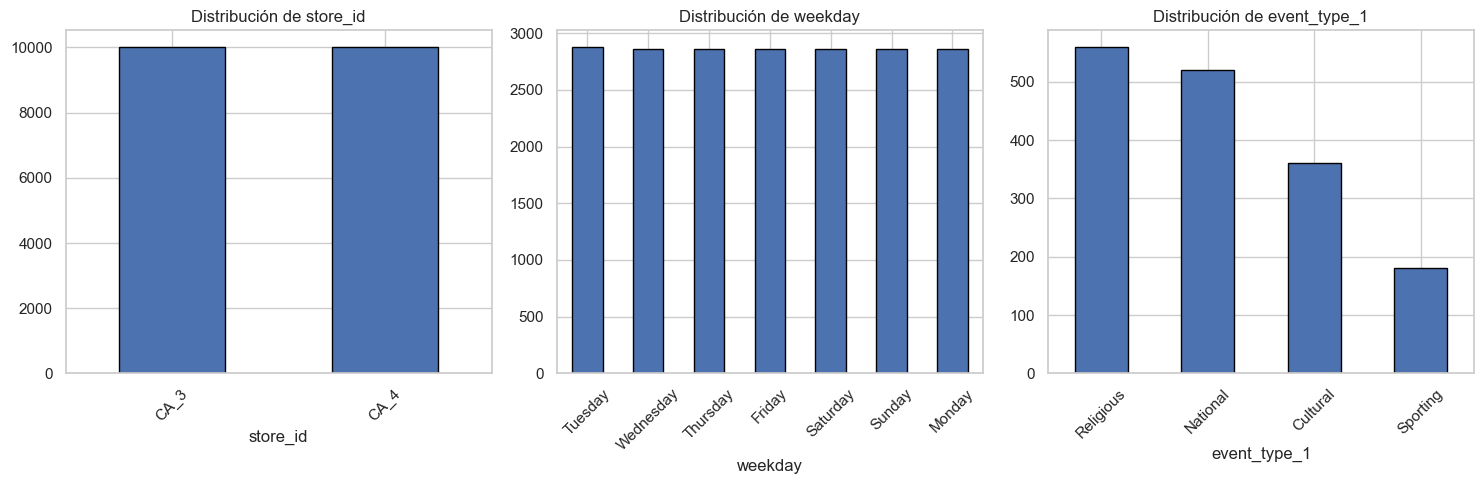

In [33]:
# Simulación de datos de frecuencia (sustituir con valores reales)
categorical_columns = ["store_id", "weekday", "event_type_1"]
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(categorical_columns):
    # Simulación de conteo (sustituir con df[col].value_counts() en un entorno real)
    counts = df[col].value_counts().head(10)  # Tomar solo las 10 categorías más comunes
    counts.plot(kind="bar", ax=axes[i], edgecolor="black")
    axes[i].set_title(f"Distribución de {col}")
    axes[i].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()


Conclusión:
* No hay variables con categorías raras
* Hay meses con menos registros, esto puede ser porque son los meses con menos de 31 días
* 2015 tiene menos registros ¿serán los de validación o hay más?

In [34]:
df.groupby('year').d.nunique()

year
2013    365
2014    365
2015    272
Name: d, dtype: int64

## Gestión de Numéricas

### Estadísticos

In [35]:
num.describe().T

count          mean        std      min      25%       50%  \
wm_yr_wk    20040.0  11407.320359  79.212919  11249.0  11333.0  11415.50   
ventas      20040.0     28.845609  39.303075      0.0      6.0     18.00   
sell_price  19969.0      2.393765   1.235854      1.0      1.5      1.58   

                 75%       max  
wm_yr_wk    11451.00  11535.00  
ventas         37.00    763.00  
sell_price      2.98      4.98

In [36]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 14/14 [00:00<00:00, 22.82it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Valores Nulos

In [37]:
num.isna().sum().sort_values(ascending = False)

sell_price    71
wm_yr_wk       0
ventas         0
dtype: int64

In [38]:
#Por producto
df.groupby('item_id', group_keys=False).apply(lambda x: x.sell_price.isna().sum(), include_groups=False).sort_values(ascending=False)

item_id
FOODS_3_288    71
FOODS_3_090     0
FOODS_3_120     0
FOODS_3_202     0
FOODS_3_252     0
FOODS_3_329     0
FOODS_3_555     0
FOODS_3_586     0
FOODS_3_587     0
FOODS_3_714     0
dtype: int64

In [39]:
#Por nivel de ventas
df.groupby('ventas', group_keys=False).apply(lambda x: x.sell_price.isna().sum(), include_groups=False).sort_values(ascending=False)

ventas
0      71
208     0
206     0
205     0
204     0
       ..
99      0
98      0
97      0
96      0
763     0
Length: 300, dtype: int64

Solo pasa en un producto y solo los días en los que no hay ventas.

Claramente el motivo es que si no hay ventas no le pone el precio.

Tenemos que corregir esto, ya que es artificial:

El producto tiene un precio aunque ese día no haya habido ventas
Lo que tendría más sentido es imputar esos nulos por el primer valor válido anterior SEGMENTADO POR PRODUCTO.

Pero podría pasar que el primer día de un producto tuviera ventas cero, lo cual arrastraría los nulos hacia delante sin solucionar el problema.

Así que vamos a imputar por el valor más frecuente del precio de CADA PRODUCTO (la moda).

Esto añade complejidad, ya que necesitamos el producto que no lo tenemos en num.

Así que tenemos que incluirlo temporalmente y después eliminarlo.

In [40]:
# Incluir item_id en num:
num = pd.concat([num,cat.item_id], axis = 1)
num

wm_yr_wk  ventas  sell_price      item_id
date                                                 
2013-01-01     11249       0        1.25  FOODS_3_090
2013-01-01     11249       0        4.98  FOODS_3_120
2013-01-01     11249      20        4.28  FOODS_3_202
2013-01-01     11249      34        1.48  FOODS_3_252
2013-01-01     11249       0         NaN  FOODS_3_288
...              ...     ...         ...          ...
2015-09-29     11535       0        2.98  FOODS_3_329
2015-09-29     11535       4        1.68  FOODS_3_555
2015-09-29     11535       3        1.68  FOODS_3_586
2015-09-29     11535       6        2.48  FOODS_3_587
2015-09-29     11535       7        1.58  FOODS_3_714

[20040 rows x 4 columns]

In [41]:
# Imputar por la moda:
def imputar_moda(registros):
    #Calcula la moda del precio en ese producto
    moda = registros.sell_price.mode()[0]
    #Imputa los nulos
    registros.loc[registros.sell_price.isna(),'sell_price'] = moda
    #Devuelve todos los registros del producto
    return(registros)

num = num.groupby('item_id', group_keys=False).apply(imputar_moda)

In [42]:
# Comprobar:
num.groupby('item_id').sell_price.value_counts()

item_id      sell_price
FOODS_3_090  1.48           624
             1.38           546
             1.44           504
             1.00           280
             1.25            50
FOODS_3_120  4.98          2004
FOODS_3_202  4.58           603
             4.38           525
             4.28           386
             3.98           350
             3.00           105
             3.33            21
             3.25             7
             4.48             7
FOODS_3_252  1.58          1058
             1.48           946
FOODS_3_288  1.50          1976
             1.25            21
             1.18             7
FOODS_3_329  2.98          1955
             2.74            42
             1.98             7
FOODS_3_555  1.58          1149
             1.68           855
FOODS_3_586  1.58          1149
             1.68           855
FOODS_3_587  2.48          1520
             2.68           421
             1.98            63
FOODS_3_714  1.58          1198
             1.4

In [43]:
# Eliminar item_id de num
num.drop(columns = 'item_id',inplace=True)

In [44]:
num.head()

wm_yr_wk  ventas  sell_price
date                                    
2013-01-01     11249       0        1.25
2013-01-01     11249      33        1.25
2013-01-01     11249       0        4.98
2013-01-01     11249       0        4.98
2013-01-01     11249      20        4.28

### Valores Atipicos

In [45]:
# Por desviacion típica:

# Definir el número de desviaciones típicas:
num_desv_tip = 4

# Funcion que devuelve indice de valores atipicos:
def atipicos_desv_tip(variable, num_desv_tip = 4):
    #sacamos los nulos por ahora
    variable = variable.dropna()
    #calculamos los límites
    media = np.mean(variable)
    sd = np.std(variable)
    umbral = sd * num_desv_tip
    lim_inf = media - umbral
    lim_sup = media + umbral
    #encontramos los índices de los que están fuera de los límites
    indices = [indice for indice,valor in variable.items() if valor < lim_inf or valor > lim_sup]
    return(indices)

# Funcion que cuenta el número de atípicos:
def conteo_atipicos(df,variable, num_desv_tip = 4):
    atipicos = atipicos_desv_tip(df[variable], num_desv_tip)
    return(df.loc[atipicos,variable].value_counts())

# Variables a aplicar la corrección de atípicos:
var_atipicos_dt = ['ventas','sell_price']

# Funcion para aplicar:
for variable in var_atipicos_dt:
    print('\n' + variable + ':\n')
    print(conteo_atipicos(num,variable,num_desv_tip))


ventas:

ventas
0      508
1       99
5       94
10      92
7       91
      ... 
469      1
130      1
498      1
532      1
103      1
Name: count, Length: 243, dtype: int64

sell_price:

Series([], Name: count, dtype: int64)


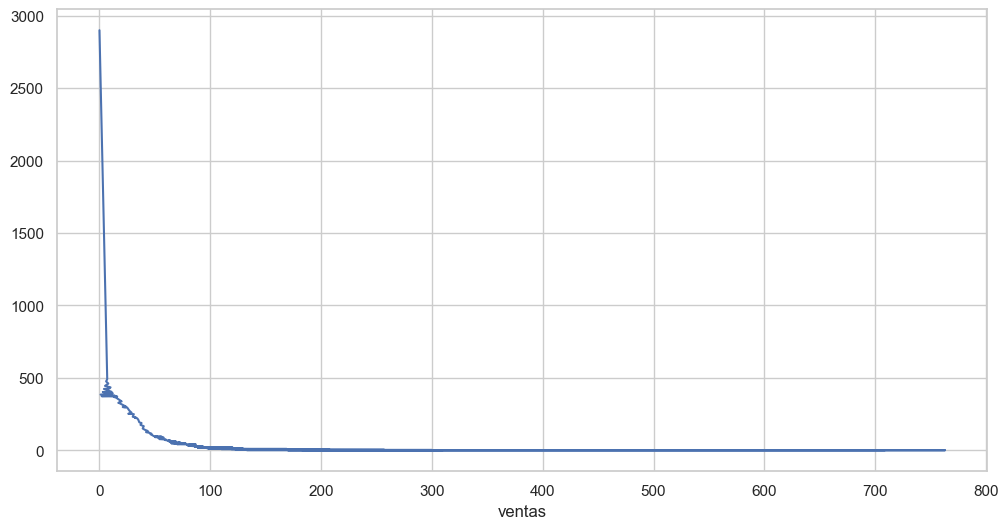

In [46]:
num.ventas.value_counts().plot(figsize = (12,6))
plt.show()

Conclusión:

* Es un claro ejemplo de cola larga, que es muy frecuente en retail
* Mejor no hacer nada por ahora en cuanto a atípicos, en EDA quizá lo veamos mejor

# EDA

## EDA Categoricas

### Análisis de Frecuencias

In [47]:
cat.columns.to_list()

['store_id',
 'item_id',
 'd',
 'year',
 'month',
 'wday',
 'weekday',
 'event_name_1',
 'event_type_1']

In [48]:
incluir = cat.columns.to_list()
del incluir[2]

In [49]:
def frecuencias_cat(df_cat):
    # Asegúrate de que todas las columnas son de tipo 'str' para evitar problemas de comparación
    df_cat = df_cat.astype(str)
    
    resultado = df_cat.apply(lambda x: x.value_counts(normalize=True)) \
                      .T.stack() \
                      .to_frame().reset_index() \
                      .rename(columns={'level_0': 'Variable', 'level_1': 'Valor', 0: "Frecuencia"}) \
                      .sort_values(by=['Variable', 'Frecuencia'])
    return resultado
pd.set_option('display.max_rows', None)

frecuencias_cat(cat[incluir])

Variable                Valor  Frecuencia
41  event_name_1         Chanukah End    0.001996
42  event_name_1            Christmas    0.001996
43  event_name_1        Cinco De Mayo    0.001996
44  event_name_1          ColumbusDay    0.001996
48  event_name_1         Father's day    0.001996
49  event_name_1            Halloween    0.001996
61  event_name_1       OrthodoxEaster    0.001996
69  event_name_1         Thanksgiving    0.001996
71  event_name_1          VeteransDay    0.001996
45  event_name_1               Easter    0.002994
46  event_name_1          Eid al-Fitr    0.002994
47  event_name_1            EidAlAdha    0.002994
50  event_name_1      IndependenceDay    0.002994
51  event_name_1             LaborDay    0.002994
52  event_name_1            LentStart    0.002994
53  event_name_1            LentWeek2    0.002994
54  event_name_1  MartinLutherKingDay    0.002994
55  event_name_1          MemorialDay    0.002994
56  event_name_1         Mother's day    0.002994
57  event_name_1         NBAFinalsEnd    0.002994
58  event_name_1       NBAFinalsStart    0.002994
59  event_name_1              NewYear    0.002994
60  event_name_1    OrthodoxChristmas    0.002994
62  event_name_1           Pesach End    0.002994
63  event_name_1        PresidentsDay    0.002994
64  event_name_1            Purim End    0.002994
65  event_name_1       Ramadan starts    0.002994
67  event_name_1        StPatricksDay    0.002994
68  event_name_1            SuperBowl    0.002994
70  event_name_1        ValentinesDay    0.002994
66  event_name_1           Sin_evento    0.919162
76  event_type_1             Sporting    0.008982
72  event_type_1             Cultural    0.017964
73  event_type_1             National    0.025948
74  event_type_1            Religious    0.027944
75  event_type_1           Sin_evento    0.919162
2        item_id          FOODS_3_090    0.100000
3        item_id          FOODS_3_120    0.100000
4        item_id          FOODS_3_202    0.100000
5        item_id          FOODS_3_252    0.100000
6        item_id          FOODS_3_288    0.100000
7        item_id          FOODS_3_329    0.100000
8        item_id          FOODS_3_555    0.100000
9        item_id          FOODS_3_586    0.100000
10       item_id          FOODS_3_587    0.100000
11       item_id          FOODS_3_714    0.100000
17         month                   11    0.059880
16         month                   10    0.061876
18         month                   12    0.061876
19         month                    2    0.083832
26         month                    9    0.088822
21         month                    4    0.089820
23         month                    6    0.089820
15         month                    1    0.092814
20         month                    3    0.092814
22         month                    5    0.092814
24         month                    7    0.092814
25         month                    8    0.092814
0       store_id                 CA_3    0.500000
1       store_id                 CA_4    0.500000
27          wday                    1    0.142715
28          wday                    2    0.142715
29          wday                    3    0.142715
31          wday                    5    0.142715
32          wday                    6    0.142715
33          wday                    7    0.142715
30          wday                    4    0.143713
34       weekday               Friday    0.142715
35       weekday               Monday    0.142715
36       weekday             Saturday    0.142715
37       weekday               Sunday    0.142715
38       weekday             Thursday    0.142715
40       weekday            Wednesday    0.142715
39       weekday              Tuesday    0.143713
14          year                 2015    0.271457
12          year                 2013    0.364271
13          year                 2014    0.364271

### Análisis Grafico

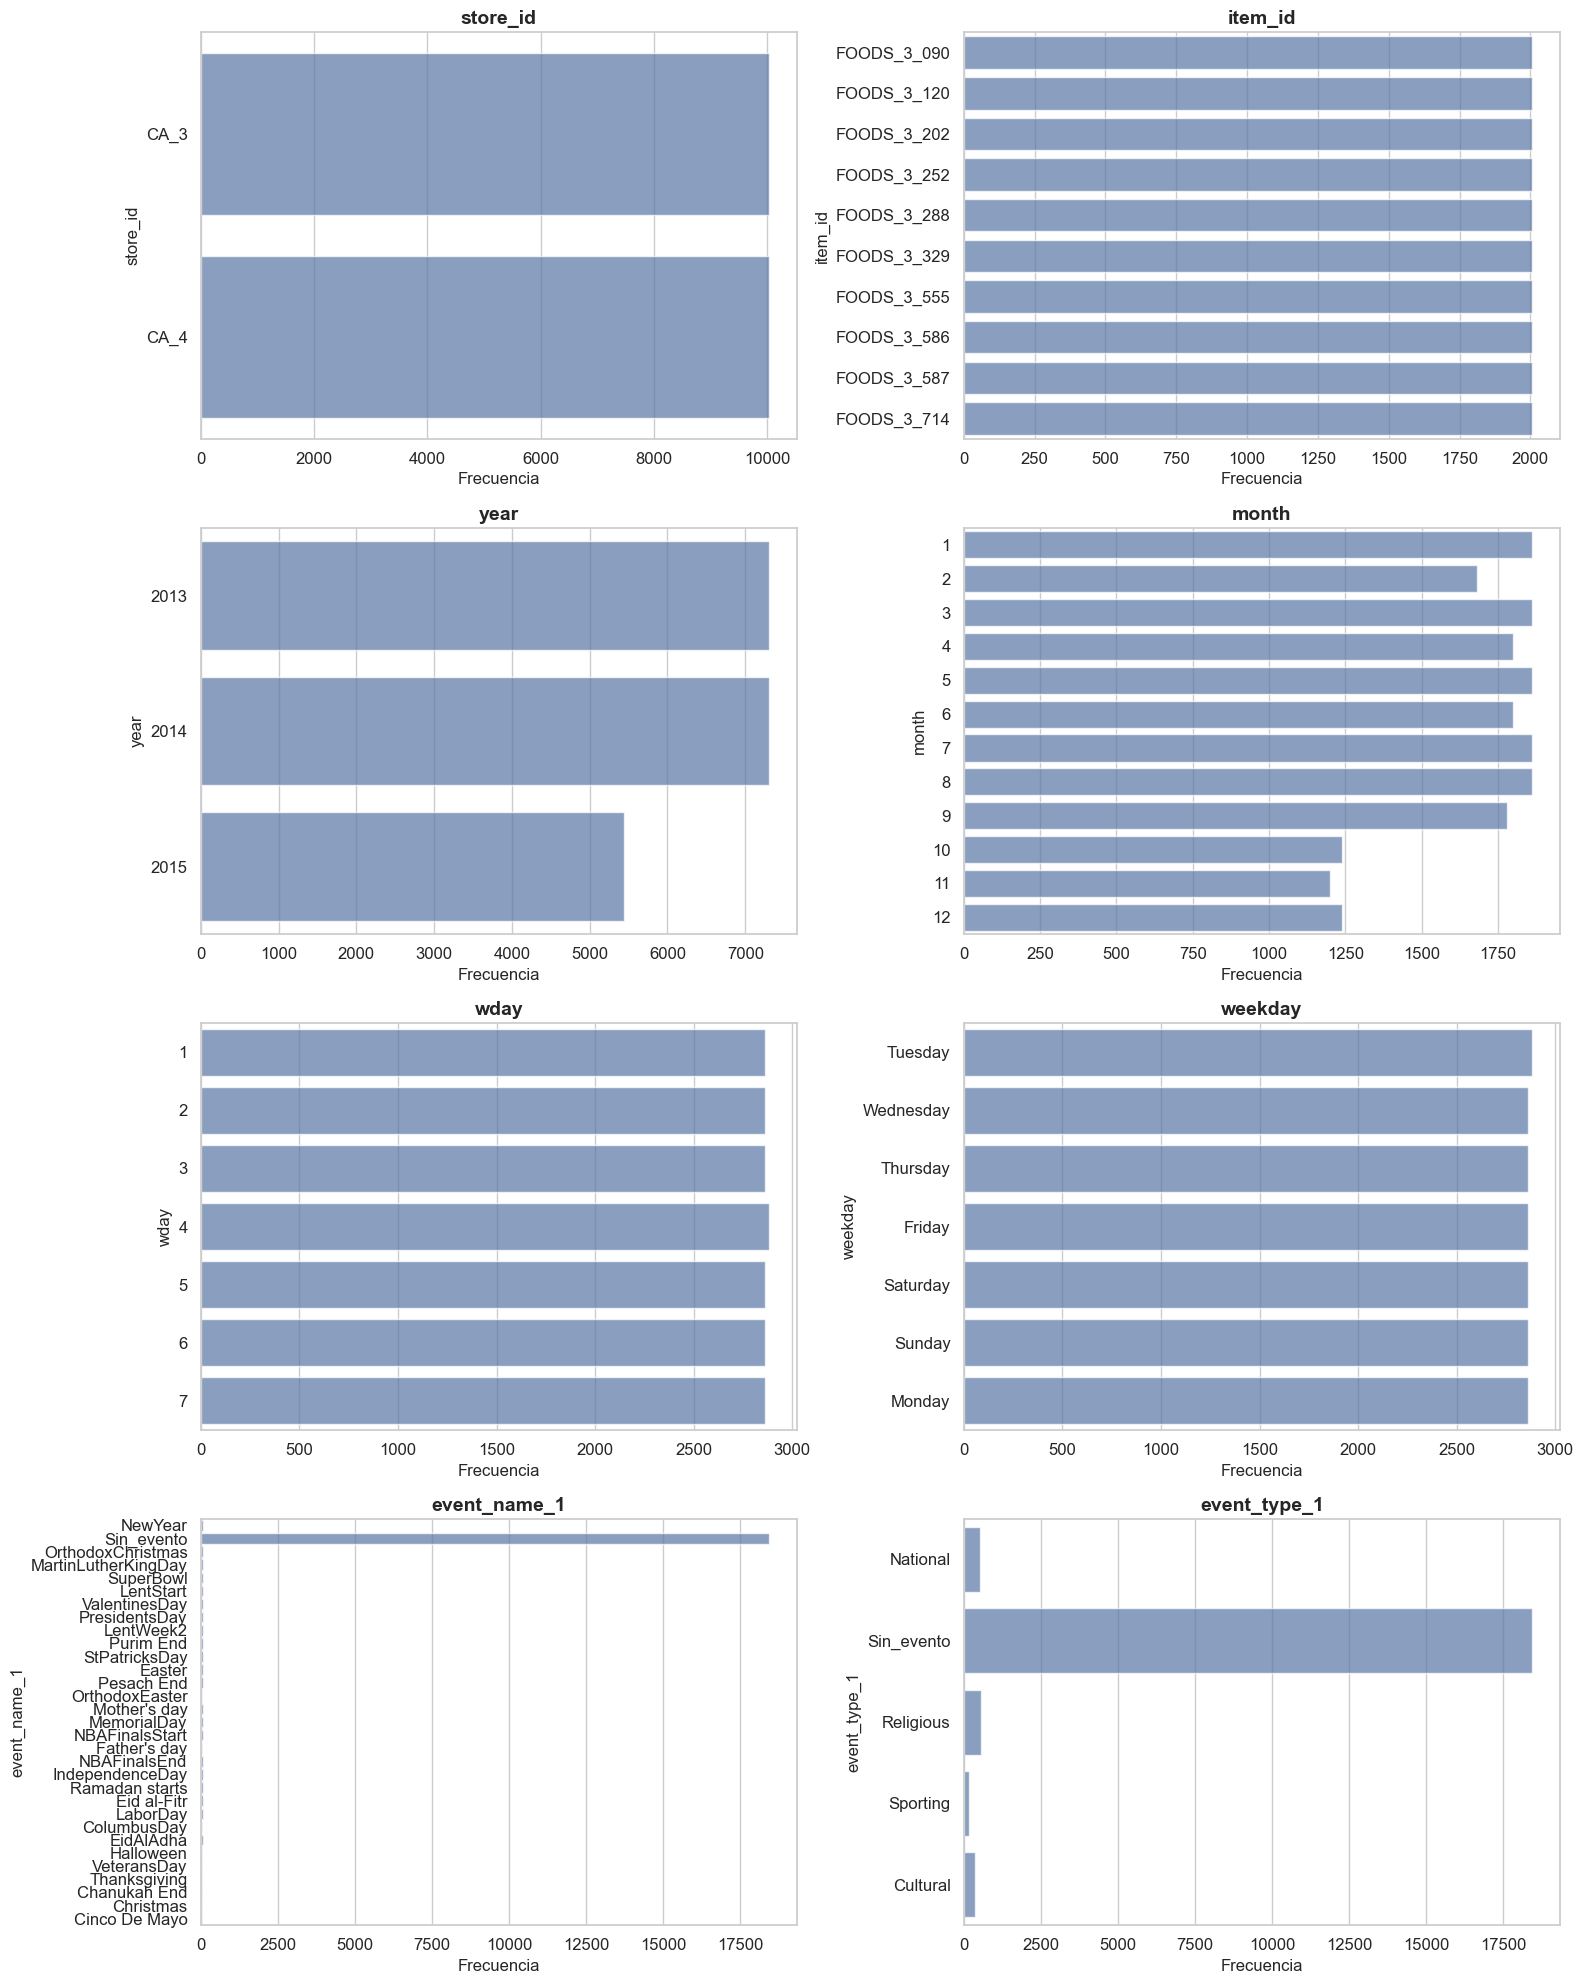

In [53]:
def graficos_eda_categoricos(cat):
    """
    Genera gráficos de barras horizontales para variables categóricas usando Seaborn,
    con colores pastel y transparencia.
    
    Parámetros:
    cat (pd.DataFrame): DataFrame con variables categóricas.
    """
    # Calculamos el número de filas necesarias (2 gráficos por fila)
    filas = ceil(cat.shape[1] / 2)

    # Crear la figura y ejes
    fig, ax = plt.subplots(nrows=filas, ncols=2, figsize=(16, filas * 5))
    ax = ax.flatten()  # Aplanamos la matriz de ejes para iterar fácilmente

    # Generar gráficos para cada variable categórica
    for i, variable in enumerate(cat.columns):
        sns.countplot(y=cat[variable], ax=ax[i], alpha=0.7)  # 🔹 Transparencia agregada
        ax[i].set_title(variable, fontsize=14, fontweight="bold")
        ax[i].set_xlabel("Frecuencia", fontsize=12)
        ax[i].tick_params(labelsize=12)

    # Ocultar ejes vacíos si hay un número impar de variables
    for j in range(i + 1, len(ax)):
        ax[j].set_visible(False)

    # Ajustar diseño y mostrar los gráficos
    plt.tight_layout()
    plt.show()

graficos_eda_categoricos(cat[incluir])

## EDA Numéricos

### Análisis Estadístico

In [50]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)
estadisticos_cont(num)

count          mean    median        std      min      25%  \
wm_yr_wk    20040.0  11407.320359  11415.50  79.212919  11249.0  11333.0   
ventas      20040.0     28.845609     18.00  39.303075      0.0      6.0   
sell_price  20040.0      2.390598      1.58   1.234805      1.0      1.5   

                 50%       75%       max  
wm_yr_wk    11415.50  11451.00  11535.00  
ventas         18.00     37.00    763.00  
sell_price      1.58      2.98      4.98

### Analisis Grafico

In [51]:
# El analisis que tiene mas sentido es el de Ventas y Precios por diferentes dimensiones. Unimos nuevamente los dos dataframe
df = pd.concat([cat,num], axis=1)

df.head()

store_id      item_id      d  year month wday  weekday  \
date                                                                
2013-01-01     CA_3  FOODS_3_090  d_704  2013     1    4  Tuesday   
2013-01-01     CA_3  FOODS_3_120  d_704  2013     1    4  Tuesday   
2013-01-01     CA_3  FOODS_3_202  d_704  2013     1    4  Tuesday   
2013-01-01     CA_3  FOODS_3_252  d_704  2013     1    4  Tuesday   
2013-01-01     CA_3  FOODS_3_288  d_704  2013     1    4  Tuesday   

           event_name_1 event_type_1  wm_yr_wk  ventas  sell_price  
date                                                                
2013-01-01      NewYear     National     11249       0        1.25  
2013-01-01      NewYear     National     11249      33        1.25  
2013-01-01      NewYear     National     11249       0        4.98  
2013-01-01      NewYear     National     11249       0        4.98  
2013-01-01      NewYear     National     11249      20        4.28

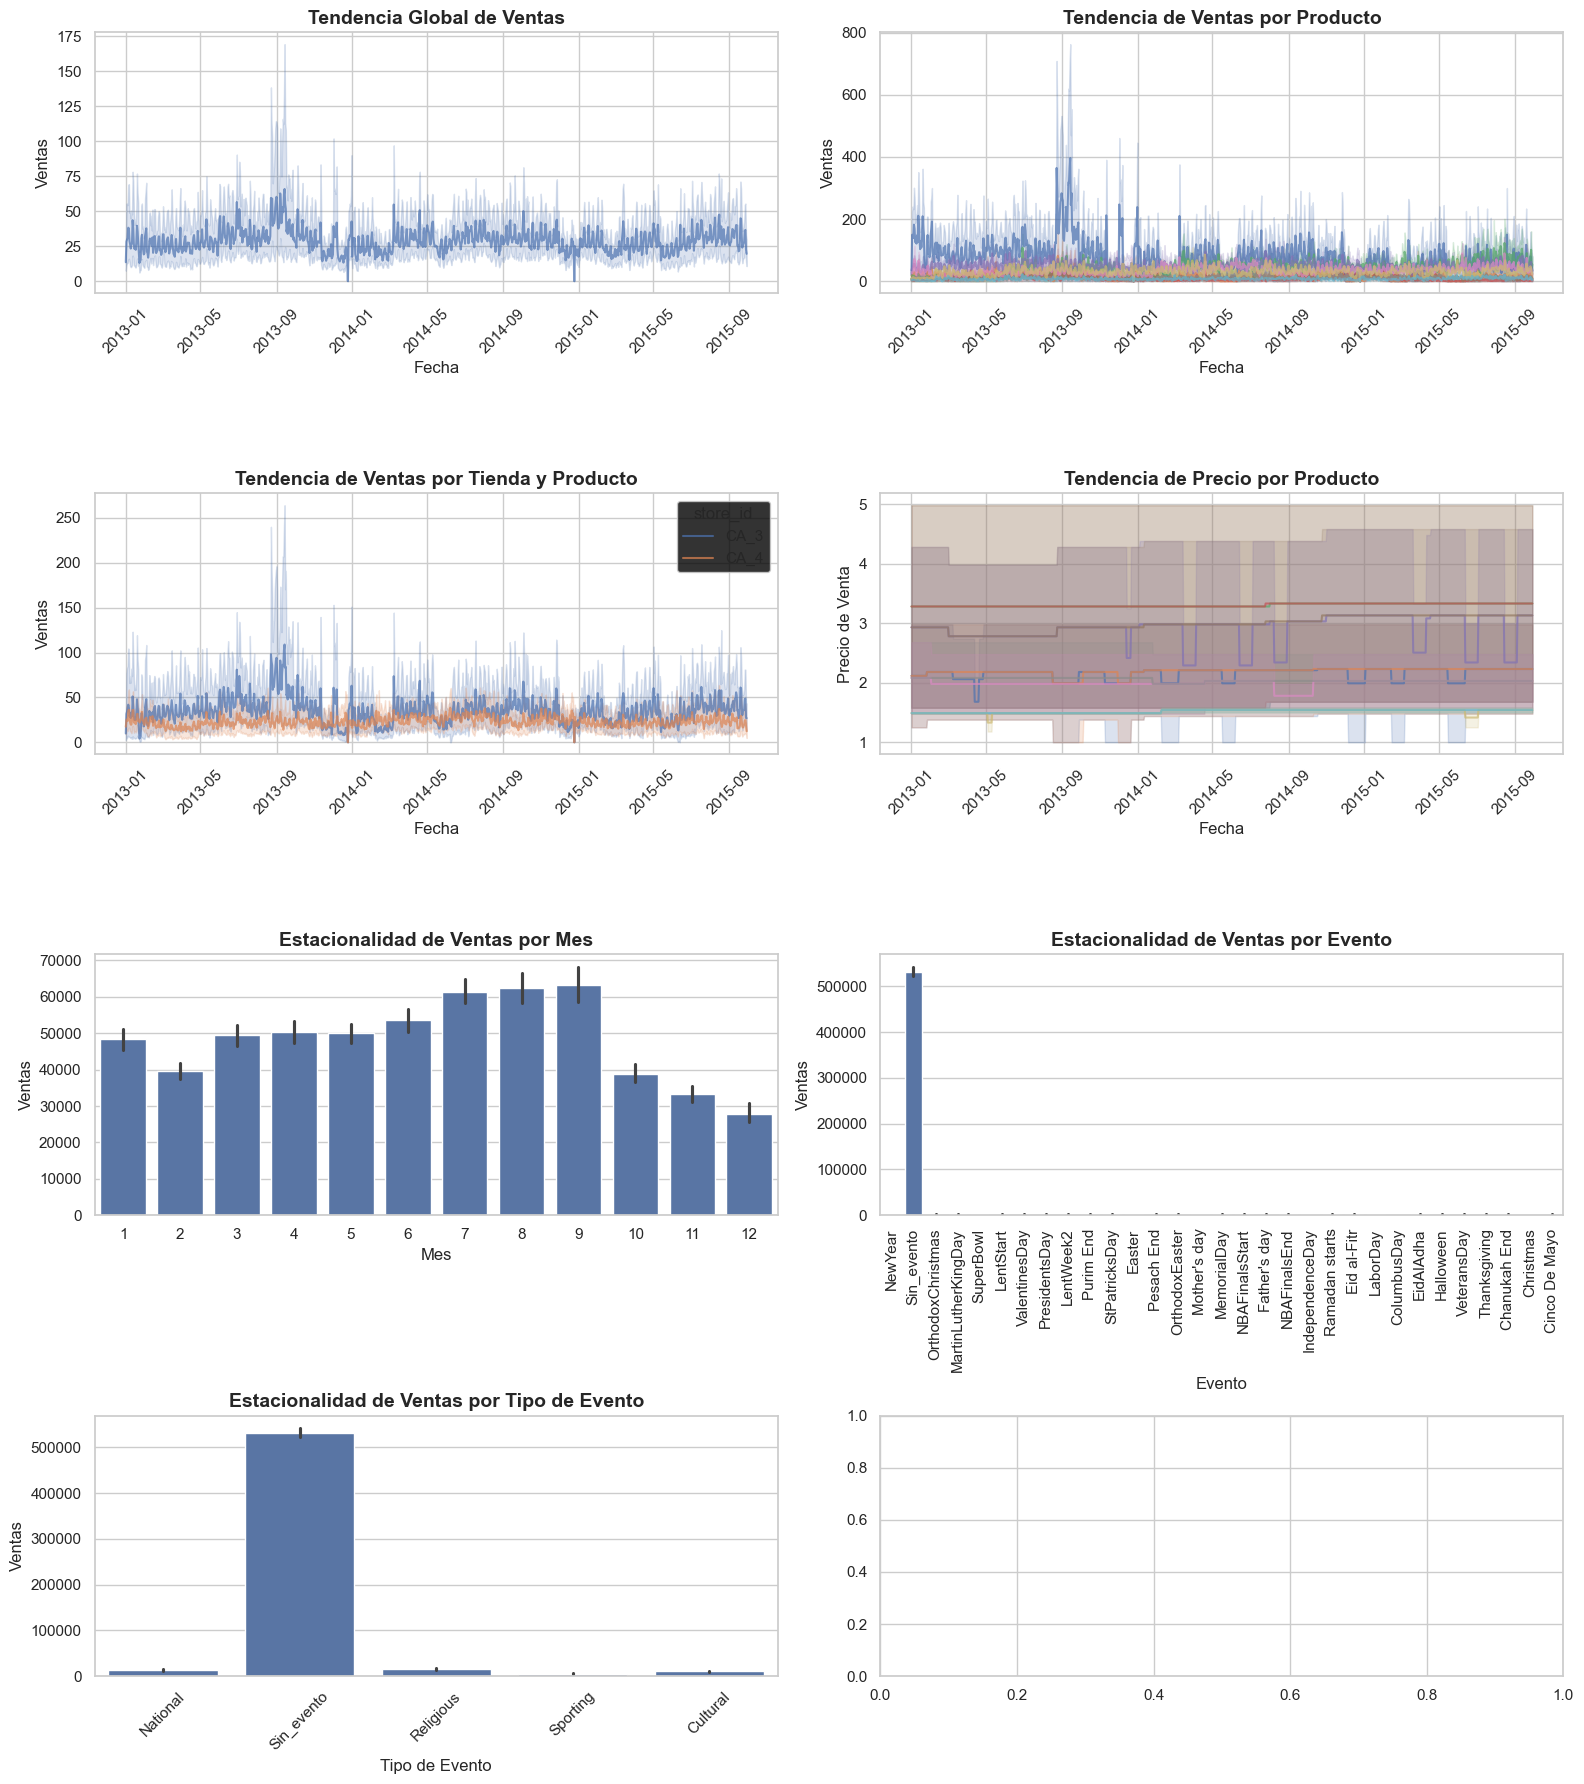

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Configuración de estilo en Seaborn
sns.set(style="whitegrid", rc={"axes.facecolor": (0, 0, 0, 0)})  # Fondo transparente

def analisis_graficos(df):
    """
    Genera gráficos de análisis exploratorio sobre ventas y precios.
    
    Parámetros:
    df (pd.DataFrame): DataFrame con las variables relevantes.
    """
    # Asegurar que el índice es datetime
    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index)
    
    fig, axes = plt.subplots(4, 2, figsize=(16, 18))  # Crear una cuadrícula de 4x2
    axes = axes.flatten()
    
    # ----------------- 1. Tendencia global de ventas -----------------
    sns.lineplot(ax=axes[0], x=df.index, y=df["ventas"], alpha=0.7, color="b")
    axes[0].set_title("Tendencia Global de Ventas", fontsize=14, fontweight="bold")
    axes[0].set_xlabel("Fecha", fontsize=12)
    axes[0].set_ylabel("Ventas", fontsize=12)
    axes[0].tick_params(axis='x', rotation=45)
    
    # ----------------- 2. Tendencia de ventas por producto -----------------
    sns.lineplot(ax=axes[1], x=df.index, y=df["ventas"], hue=df["item_id"], alpha=0.7, legend=False)
    axes[1].set_title("Tendencia de Ventas por Producto", fontsize=14, fontweight="bold")
    axes[1].set_xlabel("Fecha", fontsize=12)
    axes[1].set_ylabel("Ventas", fontsize=12)
    axes[1].tick_params(axis='x', rotation=45)
    
    # ----------------- 3. Tendencia de ventas por tienda y producto -----------------
    sns.lineplot(ax=axes[2], x=df.index, y=df["ventas"], hue=df["store_id"], alpha=0.7)
    axes[2].set_title("Tendencia de Ventas por Tienda y Producto", fontsize=14, fontweight="bold")
    axes[2].set_xlabel("Fecha", fontsize=12)
    axes[2].set_ylabel("Ventas", fontsize=12)
    axes[2].tick_params(axis='x', rotation=45)
    
    # ----------------- 4. Tendencia de precio por producto -----------------
    sns.lineplot(ax=axes[3], x=df.index, y=df["sell_price"], hue=df["item_id"], alpha=0.7, legend=False)
    axes[3].set_title("Tendencia de Precio por Producto", fontsize=14, fontweight="bold")
    axes[3].set_xlabel("Fecha", fontsize=12)
    axes[3].set_ylabel("Precio de Venta", fontsize=12)
    axes[3].tick_params(axis='x', rotation=45)
    
    # ----------------- 5. Estacionalidad por producto (Barras) -----------------
    sns.barplot(ax=axes[4], x=df["month"], y=df["ventas"], estimator=sum)
    axes[4].set_title("Estacionalidad de Ventas por Mes", fontsize=14, fontweight="bold")
    axes[4].set_xlabel("Mes", fontsize=12)
    axes[4].set_ylabel("Ventas", fontsize=12)
    
    # ----------------- 6. Estacionalidad por evento (Barras) -----------------
    sns.barplot(ax=axes[5], x=df["event_name_1"], y=df["ventas"], estimator=sum)
    axes[5].set_title("Estacionalidad de Ventas por Evento", fontsize=14, fontweight="bold")
    axes[5].set_xlabel("Evento", fontsize=12)
    axes[5].set_ylabel("Ventas", fontsize=12)
    axes[5].tick_params(axis='x', rotation=90)
    
    # ----------------- 7. Estacionalidad por tipo de evento (Barras) -----------------
    sns.barplot(ax=axes[6], x=df["event_type_1"], y=df["ventas"], estimator=sum)
    axes[6].set_title("Estacionalidad de Ventas por Tipo de Evento", fontsize=14, fontweight="bold")
    axes[6].set_xlabel("Tipo de Evento", fontsize=12)
    axes[6].set_ylabel("Ventas", fontsize=12)
    axes[6].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

# Llamar a la función con el DataFrame
analisis_graficos(df)

# Creacion de Nuevas Variables de Negocio

## Variables de Demanda intermitente

Esta variable va a identificar cuantos días seguidos han transcurrido con ventas cero.
La definiremos como que si los últimos n días han tenido cero ventas entonces hay rotura de stock.
Podemos crear varias cambiando el n.

In [52]:
def rotura_stock(ventas, n = 5):
    cero_ventas = pd.Series(np.where(ventas == 0,1,0))
    num_ceros = cero_ventas.rolling(n).sum()
    rotura_stock = np.where(num_ceros == n,1,0)
    return(rotura_stock)

In [53]:
df = df.sort_values(by = ['store_id','item_id','date'])
df['rotura_stock_3'] = df.groupby(['store_id','item_id']).ventas.transform(lambda x: rotura_stock(x, 3)).values
df['rotura_stock_7'] = df.groupby(['store_id','item_id']).ventas.transform(lambda x: rotura_stock(x,7)).values
df['rotura_stock_15'] = df.groupby(['store_id','item_id']).ventas.transform(lambda x: rotura_stock(x,15)).values

## Variables de lag

Vamos a crear lags sobre las siguientes variables:

* ventas: lags de 15 días
* sell_price: lags de 7 días
* rotura_stock: lag de un día

In [66]:
def crear_lags(df, variable, num_lags = 7):
    
    #Crea el objeto dataframe
    lags = pd.DataFrame()
    
    #Crea todos los lags
    for cada in range(1,num_lags+1):
        lags[variable + '_lag_'+ str(cada)] = df[variable].shift(cada)
    
    #Devuelve el dataframe de lags
    return(lags)

In [67]:
lags_sell_price_df = (df.groupby(['store_id', 'item_id'])
                        .apply(lambda x: crear_lags(df = x, variable = 'sell_price', num_lags= 7))
                        .reset_index()
                        .set_index('date'))

In [68]:
lags_rotura_stock_3_df = (df.groupby(['store_id','item_id'])
                            .apply(lambda x: crear_lags(df = x, variable = 'rotura_stock_3', num_lags= 1))
                            .reset_index()
                            .set_index('date'))

In [69]:
lags_rotura_stock_7_df = (df.groupby(['store_id','item_id'])
                            .apply(lambda x: crear_lags(df = x, variable = 'rotura_stock_7', num_lags= 1))
                            .reset_index()
                            .set_index('date'))

In [70]:
lags_rotura_stock_15_df = (df.groupby(['store_id','item_id'])
                            .apply(lambda x: crear_lags(df = x, variable = 'rotura_stock_15', num_lags= 1))
                            .reset_index()
                            .set_index('date'))

In [71]:
lags_ventas_df = (df.groupby(['store_id','item_id'])
                    .apply(lambda x: crear_lags(df = x, variable = 'ventas', num_lags= 15))
                    .reset_index()
                    .set_index('date'))

## Variables de ventanas moviles

Vamos a crear tres tipos de ventanas móviles sobre las ventas:
* mínimo móvil
* media móvil
* máximo móvil
* Cada uno de ellos en el rango de 15 días.

In [72]:
def min_movil(df, variable, num_periodos = 7):

    minm = pd.DataFrame()
    
    for cada in range(2,num_periodos+1):
        minm[variable + '_minm_' + str(cada)] = df[variable].shift(1).rolling(cada).min()
    
    #Devuelve el dataframe de lags
    return(minm)

In [73]:
def media_movil(df, variable, num_periodos = 7):

    mm = pd.DataFrame()
    
    for cada in range(2,num_periodos+1):
        mm[variable + '_mm_' + str(cada)] = df[variable].shift(1).rolling(cada).mean()
    
    #Devuelve el dataframe de lags
    return(mm)

In [74]:
def max_movil(df, variable, num_periodos = 7):

    maxm = pd.DataFrame()
    
    for cada in range(2,num_periodos+1):
        maxm[variable + '_maxm_' + str(cada)] = df[variable].shift(1).rolling(cada).max()
    
    #Devuelve el dataframe de lags
    return(maxm)

In [75]:
min_movil_df = (df.groupby(['store_id','item_id'])
                  .apply(lambda x: min_movil(df = x, variable = 'ventas', num_periodos= 15))
                  .reset_index()
                  .set_index('date'))

In [76]:
media_movil_df = (df.groupby(['store_id','item_id'])
                    .apply(lambda x: media_movil(df = x, variable = 'ventas', num_periodos= 15))
                    .reset_index()
                    .set_index('date'))

In [77]:
max_movil_df = (df.groupby(['store_id','item_id'])
                    .apply(lambda x: max_movil(df = x, variable = 'ventas', num_periodos= 15))
                    .reset_index()
                    .set_index('date'))

# Preparar Dataset para modelizar

In [78]:
df_unido = pd.concat([df,
                      lags_sell_price_df,
                      lags_rotura_stock_3_df,
                      lags_rotura_stock_7_df,
                      lags_rotura_stock_15_df,
                      lags_ventas_df,
                      min_movil_df,
                      media_movil_df,
                      max_movil_df], axis = 1)

# Eliminar columnas duplicadas
df_unido = df_unido.loc[:,~df_unido.columns.duplicated()]
df_unido

# Eliminar nulos que se hayan generado:
df_unido.dropna(inplace=True)

# Eliminar variables que no se van a utilizar:
a_eliminar = ['d','wm_yr_wk','sell_price','rotura_stock_3','rotura_stock_7','rotura_stock_15']
df_unido.drop(columns=a_eliminar, inplace=True)

In [79]:
df_unido.head()

store_id      item_id  year month wday    weekday event_name_1  \
date                                                                        
2013-01-16     CA_3  FOODS_3_090  2013     1    5  Wednesday   Sin_evento   
2013-01-17     CA_3  FOODS_3_090  2013     1    6   Thursday   Sin_evento   
2013-01-18     CA_3  FOODS_3_090  2013     1    7     Friday   Sin_evento   
2013-01-19     CA_3  FOODS_3_090  2013     1    1   Saturday   Sin_evento   
2013-01-20     CA_3  FOODS_3_090  2013     1    2     Sunday   Sin_evento   

           event_type_1  ventas  sell_price_lag_1  ...  ventas_maxm_6  \
date                                               ...                  
2013-01-16   Sin_evento     191              1.25  ...          351.0   
2013-01-17   Sin_evento     170              1.25  ...          351.0   
2013-01-18   Sin_evento     224              1.25  ...          351.0   
2013-01-19   Sin_evento     362              1.25  ...          281.0   
2013-01-20   Sin_evento     255              1.25  ...          362.0   

            ventas_maxm_7  ventas_maxm_8  ventas_maxm_9  ventas_maxm_10  \
date                                                                      
2013-01-16          351.0          351.0          351.0           351.0   
2013-01-17          351.0          351.0          351.0           351.0   
2013-01-18          351.0          351.0          351.0           351.0   
2013-01-19          351.0          351.0          351.0           351.0   
2013-01-20          362.0          362.0          362.0           362.0   

            ventas_maxm_11  ventas_maxm_12  ventas_maxm_13  ventas_maxm_14  \
date                                                                         
2013-01-16           351.0           351.0           351.0           351.0   
2013-01-17           351.0           351.0           351.0           351.0   
2013-01-18           351.0           351.0           351.0           351.0   
2013-01-19           351.0           351.0           351.0           351.0   
2013-01-20           362.0           362.0           362.0           362.0   

            ventas_maxm_15  
date                        
2013-01-16           351.0  
2013-01-17           351.0  
2013-01-18           351.0  
2013-01-19           351.0  
2013-01-20           362.0  

[5 rows x 76 columns]

In [80]:
# Identificar la target
target = df_unido.ventas

In [81]:
# Separar nuevamente numericas de categóricas:
cat = df_unido.select_dtypes(include='O')
num = df_unido.select_dtypes(exclude='O')

## Transformacion de Categoricas

In [82]:
df_unido.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19740 entries, 2013-01-16 to 2015-09-29
Data columns (total 76 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   store_id               19740 non-null  object 
 1   item_id                19740 non-null  object 
 2   year                   19740 non-null  object 
 3   month                  19740 non-null  object 
 4   wday                   19740 non-null  object 
 5   weekday                19740 non-null  object 
 6   event_name_1           19740 non-null  object 
 7   event_type_1           19740 non-null  object 
 8   ventas                 19740 non-null  int64  
 9   sell_price_lag_1       19740 non-null  float64
 10  sell_price_lag_2       19740 non-null  float64
 11  sell_price_lag_3       19740 non-null  float64
 12  sell_price_lag_4       19740 non-null  float64
 13  sell_price_lag_5       19740 non-null  float64
 14  sell_price_lag_6       19740 non-null

## One hote encoding

In [83]:
# Variables a aplicar:
var_ohe = ['year',
          'month',
          'wday',
          'weekday',
          'event_name_1',
          'event_type_1'
        ]
# Instanciar:
ohe = OneHotEncoder(sparse_output = False, handle_unknown='ignore')

# Entrenar y aplicar:
cat_ohe = ohe.fit_transform(cat[var_ohe])

# Guardar como dataframe
cat_ohe = pd.DataFrame(cat_ohe, columns = ohe.get_feature_names_out())

## Target encoding

In [84]:
# Variables a aplicar:
var_te = ['year',
          'month',
          'wday',
          'weekday',
          'event_name_1',
          'event_type_1'
        ]

# Instanciar:
te = TargetEncoder(min_samples_leaf=100, return_df = False)

# Entrenar y aplicar:
cat_te = te.fit_transform(cat[var_te], y = target)

#Añadir sufijos a los nombres
nombres_te = [variable + '_te' for variable in var_te]

#Guardar como dataframe
cat_te = pd.DataFrame(cat_te, columns = nombres_te)

## Unificar todos los DF

In [85]:
de_df_unido = df_unido[['store_id','item_id']].reset_index()

de_df_unido.head(2)

date store_id      item_id
0 2013-01-16     CA_3  FOODS_3_090
1 2013-01-17     CA_3  FOODS_3_090

In [86]:
dataframes = [de_df_unido, cat_ohe,cat_te,num.reset_index(drop=True)]

In [87]:
df_tablon = pd.concat(dataframes, axis = 1)

df_tablon.head(10)

date store_id      item_id  year_2013  year_2014  year_2015  month_1  \
0 2013-01-16     CA_3  FOODS_3_090        1.0        0.0        0.0      1.0   
1 2013-01-17     CA_3  FOODS_3_090        1.0        0.0        0.0      1.0   
2 2013-01-18     CA_3  FOODS_3_090        1.0        0.0        0.0      1.0   
3 2013-01-19     CA_3  FOODS_3_090        1.0        0.0        0.0      1.0   
4 2013-01-20     CA_3  FOODS_3_090        1.0        0.0        0.0      1.0   
5 2013-01-21     CA_3  FOODS_3_090        1.0        0.0        0.0      1.0   
6 2013-01-22     CA_3  FOODS_3_090        1.0        0.0        0.0      1.0   
7 2013-01-23     CA_3  FOODS_3_090        1.0        0.0        0.0      1.0   
8 2013-01-24     CA_3  FOODS_3_090        1.0        0.0        0.0      1.0   
9 2013-01-25     CA_3  FOODS_3_090        1.0        0.0        0.0      1.0   

   month_2  month_3  month_4  ...  ventas_maxm_6  ventas_maxm_7  \
0      0.0      0.0      0.0  ...          351.0          351.0   
1      0.0      0.0      0.0  ...          351.0          351.0   
2      0.0      0.0      0.0  ...          351.0          351.0   
3      0.0      0.0      0.0  ...          281.0          351.0   
4      0.0      0.0      0.0  ...          362.0          362.0   
5      0.0      0.0      0.0  ...          362.0          362.0   
6      0.0      0.0      0.0  ...          362.0          362.0   
7      0.0      0.0      0.0  ...          362.0          362.0   
8      0.0      0.0      0.0  ...          362.0          362.0   
9      0.0      0.0      0.0  ...          362.0          362.0   

   ventas_maxm_8  ventas_maxm_9  ventas_maxm_10  ventas_maxm_11  \
0          351.0          351.0           351.0           351.0   
1          351.0          351.0           351.0           351.0   
2          351.0          351.0           351.0           351.0   
3          351.0          351.0           351.0           351.0   
4          362.0          362.0           362.0           362.0   
5          362.0          362.0           362.0           362.0   
6          362.0          362.0           362.0           362.0   
7          362.0          362.0           362.0           362.0   
8          362.0          362.0           362.0           362.0   
9          362.0          362.0           362.0           362.0   

   ventas_maxm_12  ventas_maxm_13  ventas_maxm_14  ventas_maxm_15  
0           351.0           351.0           351.0           351.0  
1           351.0           351.0           351.0           351.0  
2           351.0           351.0           351.0           351.0  
3           351.0           351.0           351.0           351.0  
4           362.0           362.0           362.0           362.0  
5           362.0           362.0           362.0           362.0  
6           362.0           362.0           362.0           362.0  
7           362.0           362.0           362.0           362.0  
8           362.0           362.0           362.0           362.0  
9           362.0           362.0           362.0           362.0  

[10 rows x 142 columns]

# Preseleccion de Variables

## Mutual Information

In [88]:
target = 'ventas'
x = df_tablon.drop(columns = ['date','store_id','item_id','ventas']).copy()
y =  df_tablon[target].copy()

def ranking_mi(mutual_selector, modo = 'tabla'):
    #Maqueta el ranking
    ranking_mi = pd.DataFrame(mutual_selector, index = x.columns).reset_index()
    ranking_mi.columns = ['variable','importancia_mi']
    ranking_mi = ranking_mi.sort_values(by = 'importancia_mi', ascending = False)
    ranking_mi['ranking_mi'] = np.arange(0,ranking_mi.shape[0])
    #Muestra la salida
    if modo == 'tabla':
        return(ranking_mi)
    else:
        g = ranking_mi.importancia_mi.sort_values().plot.barh(figsize = (12,20))
        g.set_yticklabels(ranking_mi.sort_values(by = 'importancia_mi').variable)
        return(g)

mutual_selector = mutual_info_regression(x,y)

rank_mi = ranking_mi(mutual_selector, modo = 'grafico')

In [89]:
ranking_mi(mutual_selector).reset_index().iloc[60:100]

index                     variable  importancia_mi  ranking_mi
60     75             sell_price_lag_5        0.276114          60
61     74             sell_price_lag_4        0.273262          61
62     73             sell_price_lag_3        0.271956          62
63     77             sell_price_lag_7        0.262458          63
64     78         rotura_stock_3_lag_1        0.222217          64
65     79         rotura_stock_7_lag_1        0.190188          65
66     80        rotura_stock_15_lag_1        0.155122          66
67     68                   weekday_te        0.016646          67
68     10                      month_8        0.010457          68
69     66                     month_te        0.010425          69
70      2                    year_2015        0.009139          70
71     50      event_name_1_Pesach End        0.008601          71
72      5                      month_3        0.008334          72
73     34     event_name_1_Eid al-Fitr        0.007760          73
74     59     event_name_1_VeteransDay        0.006612          74
75      3                      month_1        0.006294          75
76     67                      wday_te        0.005644          76
77     21                       wday_7        0.005052          77
78     20                       wday_6        0.004494          78
79     23               weekday_Monday        0.004315          79
80     22               weekday_Friday        0.004260          80
81     30       event_name_1_Christmas        0.003956          81
82     18                       wday_4        0.003950          82
83     61        event_type_1_National        0.003672          83
84     54      event_name_1_Sin_evento        0.003655          84
85     46  event_name_1_NBAFinalsStart        0.003592          85
86     43     event_name_1_MemorialDay        0.003532          86
87      6                      month_4        0.003392          87
88     26             weekday_Thursday        0.003238          88
89     14                     month_12        0.003223          89
90     31   event_name_1_Cinco De Mayo        0.002232          90
91     25               weekday_Sunday        0.001853          91
92     69              event_name_1_te        0.001746          92
93     36    event_name_1_Father's day        0.001487          93
94     27              weekday_Tuesday        0.001236          94
95      9                      month_7        0.000932          95
96     41       event_name_1_LentWeek2        0.000904          96
97     28            weekday_Wednesday        0.000834          97
98     19                       wday_5        0.000831          98
99     53  event_name_1_Ramadan starts        0.000830          99

In [90]:
posicion_variable_limite = 72
entran_mi = ranking_mi(mutual_selector).iloc[0:posicion_variable_limite].variable
x_mi = x[entran_mi].copy()
x_mi.head()

ventas_mm_8  ventas_mm_7  ventas_mm_6  ventas_mm_9  ventas_mm_10  \
0      233.375   236.000000   242.500000   228.333333         232.5   
1      230.375   235.142857   233.500000   228.666667         224.6   
2      227.000   224.428571   226.166667   223.666667         222.8   
3      224.375   225.857143   205.000000   226.666667         223.7   
4      242.875   227.428571   218.500000   239.666667         240.2   

   ventas_mm_2  ventas_mm_3  ventas_mm_5  ventas_lag_1  ventas_mm_4  ...  \
0        182.0        215.0        242.0         158.0       249.00  ...   
1        174.5        185.0        237.4         191.0       209.00  ...   
2        180.5        173.0        201.2         170.0       181.25  ...   
3        197.0        195.0        189.8         224.0       185.75  ...   
4        293.0        252.0        221.0         362.0       236.75  ...   

   sell_price_lag_3  sell_price_lag_7  rotura_stock_3_lag_1  \
0              1.25              1.25                   0.0   
1              1.25              1.25                   0.0   
2              1.25              1.25                   0.0   
3              1.25              1.25                   0.0   
4              1.25              1.25                   0.0   

   rotura_stock_7_lag_1  rotura_stock_15_lag_1  weekday_te  month_8  month_te  \
0                   0.0                    0.0   24.819858      0.0  25.39359   
1                   0.0                    0.0   25.989716      0.0  25.39359   
2                   0.0                    0.0   29.484043      0.0  25.39359   
3                   0.0                    0.0   34.898582      0.0  25.39359   
4                   0.0                    0.0   34.340426      0.0  25.39359   

   year_2015  event_name_1_Pesach End  
0        0.0                      0.0  
1        0.0                      0.0  
2        0.0                      0.0  
3        0.0                      0.0  
4        0.0                      0.0  

[5 rows x 72 columns]

In [91]:
# Incorporamos variables:

x_preseleccionado = pd.concat([df_tablon[['date','store_id','item_id']], x_mi], axis=1)
y_preseleccionado = y.copy()

In [92]:
x_preseleccionado.head()

date store_id      item_id  ventas_mm_8  ventas_mm_7  ventas_mm_6  \
0 2013-01-16     CA_3  FOODS_3_090      233.375   236.000000   242.500000   
1 2013-01-17     CA_3  FOODS_3_090      230.375   235.142857   233.500000   
2 2013-01-18     CA_3  FOODS_3_090      227.000   224.428571   226.166667   
3 2013-01-19     CA_3  FOODS_3_090      224.375   225.857143   205.000000   
4 2013-01-20     CA_3  FOODS_3_090      242.875   227.428571   218.500000   

   ventas_mm_9  ventas_mm_10  ventas_mm_2  ventas_mm_3  ...  sell_price_lag_3  \
0   228.333333         232.5        182.0        215.0  ...              1.25   
1   228.666667         224.6        174.5        185.0  ...              1.25   
2   223.666667         222.8        180.5        173.0  ...              1.25   
3   226.666667         223.7        197.0        195.0  ...              1.25   
4   239.666667         240.2        293.0        252.0  ...              1.25   

   sell_price_lag_7  rotura_stock_3_lag_1  rotura_stock_7_lag_1  \
0              1.25                   0.0                   0.0   
1              1.25                   0.0                   0.0   
2              1.25                   0.0                   0.0   
3              1.25                   0.0                   0.0   
4              1.25                   0.0                   0.0   

   rotura_stock_15_lag_1  weekday_te  month_8  month_te  year_2015  \
0                    0.0   24.819858      0.0  25.39359        0.0   
1                    0.0   25.989716      0.0  25.39359        0.0   
2                    0.0   29.484043      0.0  25.39359        0.0   
3                    0.0   34.898582      0.0  25.39359        0.0   
4                    0.0   34.340426      0.0  25.39359        0.0   

   event_name_1_Pesach End  
0                      0.0  
1                      0.0  
2                      0.0  
3                      0.0  
4                      0.0  

[5 rows x 75 columns]

In [93]:
y_preseleccionado.head()

0    191
1    170
2    224
3    362
4    255
Name: ventas, dtype: int64

# Modelizar

## Modelizacion ML

In [111]:
x = x_preseleccionado.copy()
y = y_preseleccionado.copy()

In [112]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19740 entries, 0 to 19739
Data columns (total 75 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     19740 non-null  datetime64[ns]
 1   store_id                 19740 non-null  object        
 2   item_id                  19740 non-null  object        
 3   ventas_mm_8              19740 non-null  float64       
 4   ventas_mm_7              19740 non-null  float64       
 5   ventas_mm_6              19740 non-null  float64       
 6   ventas_mm_9              19740 non-null  float64       
 7   ventas_mm_10             19740 non-null  float64       
 8   ventas_mm_2              19740 non-null  float64       
 9   ventas_mm_3              19740 non-null  float64       
 10  ventas_mm_5              19740 non-null  float64       
 11  ventas_lag_1             19740 non-null  float64       
 12  ventas_mm_4              19740 n

In [113]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 19740 entries, 0 to 19739
Series name: ventas
Non-Null Count  Dtype
--------------  -----
19740 non-null  int64
dtypes: int64(1)
memory usage: 154.3 KB


In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

In [115]:
models = {
    'RandomForest': RandomForestRegressor(),
    'XGBoost': XGBRegressor(),
    'LightGBM': LGBMRegressor()
}

param_grids = {
    'RandomForest': {
        'model__n_estimators': [100, 200],
        'model__max_depth': [5, 10]
    },
    'XGBoost': {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.05, 0.1]
    },
    'LightGBM': {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.05, 0.1]
    }
}


In [150]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Identificar columnas numéricas y categóricas
numeric_features = x.select_dtypes(include=['int64', 'float64']).columns
categorical_features = x.select_dtypes(include=['object', 'category']).columns

# Preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

def calcular_metricas(y_true, y_pred):
    return {
        'MSE': mean_squared_error(y_true, y_pred),
        'MAE': mean_absolute_error(y_true, y_pred),
        'R2': r2_score(y_true, y_pred)
    }

resultados = {}

for name, model in models.items():
    print(f"Entrenando {name}...")
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    grid = GridSearchCV(pipe, param_grids[name], cv=tscv, scoring='neg_mean_squared_error', n_jobs=-1)
    grid.fit(x, y)
    
    best_model = grid.best_estimator_
    y_pred = best_model.predict(x)
    
    resultados[name] = calcular_metricas(y, y_pred)
    
    print(f"{name} - Mejor parámetros: {grid.best_params_}")
    print(f"{name} - Métricas: {resultados[name]}")

# Ahora resultados tiene métricas para cada modelo
import pandas as pd
df_resultados = pd.DataFrame(resultados).T
print(df_resultados)

Entrenando RandomForest...
RandomForest - Mejor parámetros: {'model__max_depth': 5, 'model__n_estimators': 100}
RandomForest - Métricas: {'MSE': 207.67564459604517, 'MAE': 7.596395747750872, 'R2': 0.8640254125509387}
Entrenando XGBoost...
XGBoost - Mejor parámetros: {'model__learning_rate': 0.05, 'model__n_estimators': 100}
XGBoost - Métricas: {'MSE': 108.74222170554897, 'MAE': 6.377579004072189, 'R2': 0.9288015961647034}
Entrenando LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011833 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12748
[LightGBM] [Info] Number of data points in the train set: 19740, number of used features: 84
[LightGBM] [Info] Start training from score 28.837943
LightGBM - Mejor parámetros: {'model__learning_rate': 0.05, 'model__n_estimators': 100}
LightGBM - Métricas: {'MSE': 146.1983272802894, 'MAE': 6.702420175399337, 'R2': 0.9042773779450748}
                   

In [151]:
print(hasattr(grid, 'best_estimator_'))  # Debe ser True si el fit fue exitoso

True


Mejores parámetros: {'model__learning_rate': 0.05, 'model__n_estimators': 100}
MSE: 146.1983
MAE: 6.7024
R2: 0.9043


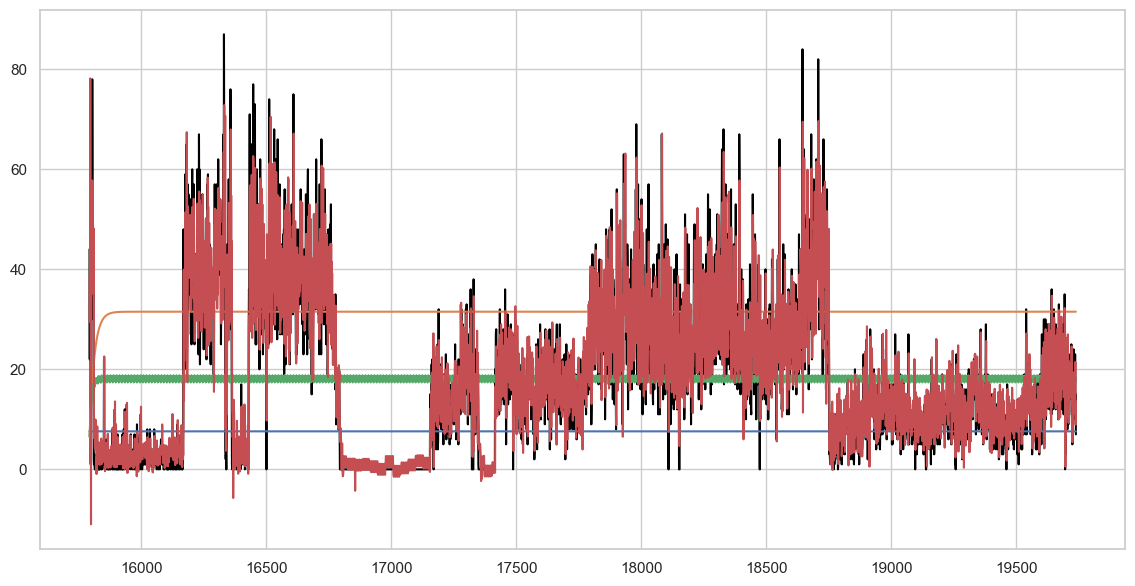

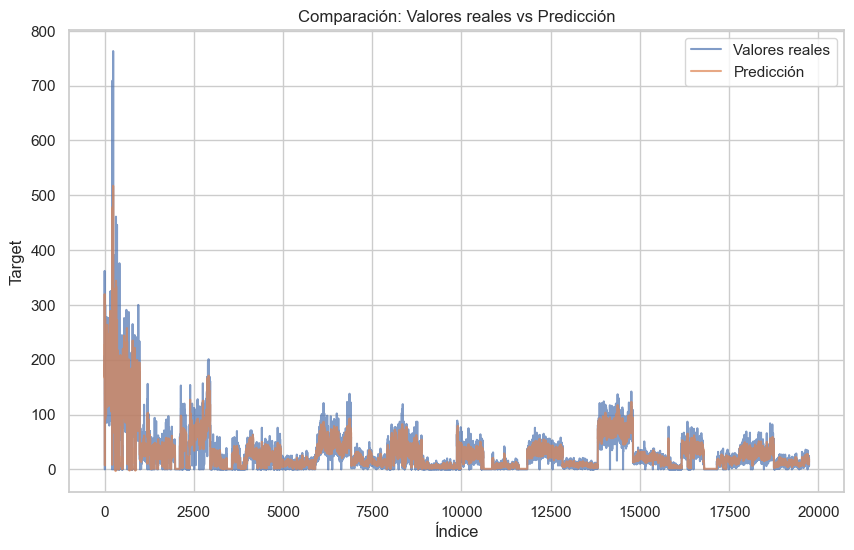

In [152]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Mejor modelo y parámetros
best_model = grid.best_estimator_
print("Mejores parámetros:", grid.best_params_)

# Predicción con el mejor modelo
y_pred = best_model.predict(x)

# Métricas
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R2: {r2:.4f}")

# Gráfico valores reales vs predichos
plt.figure(figsize=(10,6))
plt.plot(y.values, label='Valores reales', alpha=0.7)
plt.plot(y_pred, label='Predicción', alpha=0.7)
plt.title('Comparación: Valores reales vs Predicción')
plt.xlabel('Índice')
plt.ylabel('Target')
plt.legend()
plt.show()


## Modelizacion estadística

In [153]:
from sklearn.model_selection import train_test_split

# Ejemplo split temporal (ajusta según tus datos)
split_idx = int(len(y) * 0.8)
x_train, x_test = x.iloc[:split_idx], x.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

In [154]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluar_modelo(y_true, y_pred):
    return {
        'MSE': mean_squared_error(y_true, y_pred),
        'MAE': mean_absolute_error(y_true, y_pred),
        'R2': r2_score(y_true, y_pred)
    }


In [155]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.linear_model import LinearRegression

# Moving Average simple (ventana fija)
def moving_average_forecast(y_train, window, steps):
    ma = y_train.rolling(window=window).mean().iloc[-1]
    return np.repeat(ma, steps)

# Regresión Lineal simple (usando features numéricos)
lr = LinearRegression()
lr.fit(x_train.select_dtypes(include=['float64', 'int64']), y_train)
y_pred_lr = lr.predict(x_test.select_dtypes(include=['float64', 'int64']))

# ARIMA simple (ajusta orden)
model_arima = ARIMA(y_train, order=(1,0,1))
model_arima_fit = model_arima.fit()
y_pred_arima = model_arima_fit.forecast(steps=len(y_test))

# SARIMA (ejemplo con parámetros)
model_sarima = SARIMAX(y_train, order=(1,0,1), seasonal_order=(1,1,1,12))
model_sarima_fit = model_sarima.fit(disp=False)
y_pred_sarima = model_sarima_fit.forecast(steps=len(y_test))

# ARIMAX (con regresores exógenos)
model_arimax = SARIMAX(y_train, exog=x_train.select_dtypes(include=['float64', 'int64']),
                       order=(1,0,1))
model_arimax_fit = model_arimax.fit(disp=False)
y_pred_arimax = model_arimax_fit.forecast(steps=len(y_test), exog=x_test.select_dtypes(include=['float64', 'int64']))


In [156]:
resultados = {
    'Moving Average': evaluar_modelo(y_test, moving_average_forecast(y_train, window=5, steps=len(y_test))),
    'Regresión Lineal': evaluar_modelo(y_test, y_pred_lr),
    'ARIMA': evaluar_modelo(y_test, y_pred_arima),
    'SARIMA': evaluar_modelo(y_test, y_pred_sarima),
    'ARIMAX': evaluar_modelo(y_test, y_pred_arimax),
}

df_resultados = pd.DataFrame(resultados).T
print(df_resultados)


                         MSE        MAE        R2
Moving Average    345.995562  13.806282 -0.465722
Regresión Lineal   58.794651   5.467335  0.750931
ARIMA             416.397250  17.803627 -0.763961
SARIMA            237.143043  12.533544 -0.004596
ARIMAX             67.258360   5.778706  0.715077


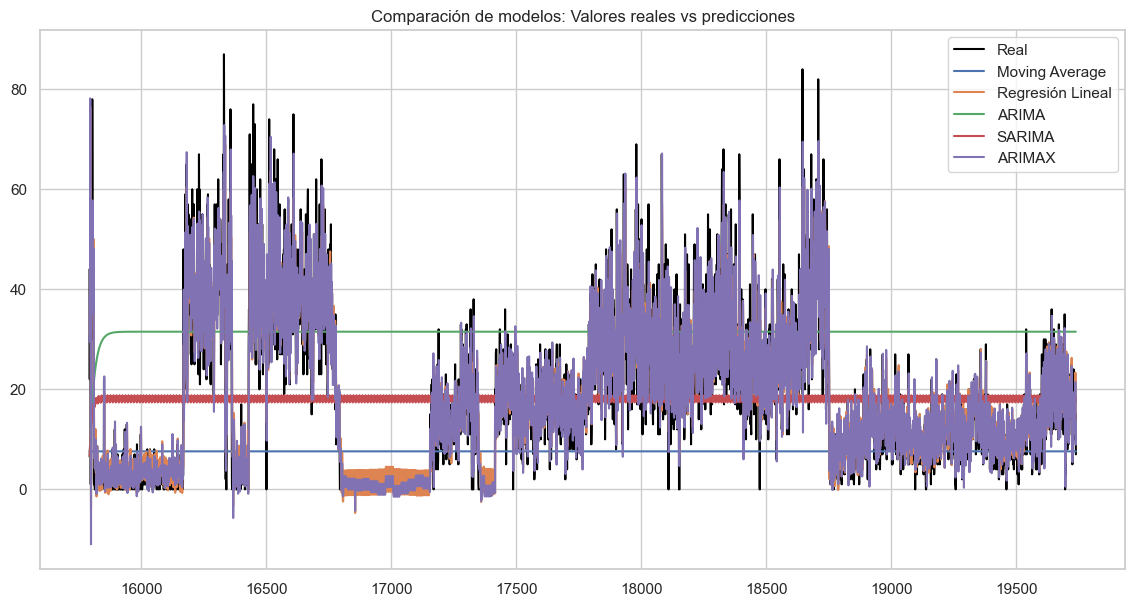

In [157]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,7))
plt.plot(y_test.index, y_test, label='Real', color='black')
plt.plot(y_test.index, moving_average_forecast(y_train, 5, len(y_test)), label='Moving Average')
plt.plot(y_test.index, y_pred_lr, label='Regresión Lineal')
plt.plot(y_test.index, y_pred_arima, label='ARIMA')
plt.plot(y_test.index, y_pred_sarima, label='SARIMA')
plt.plot(y_test.index, y_pred_arimax, label='ARIMAX')
plt.legend()
plt.title('Comparación de modelos: Valores reales vs predicciones')
plt.show()